# PRCP-1000-PortugeseBank

# Bussiness Case: Developing a Predictive Model to Boost Bank Product Sales

## Problem Statement:
The marketing team of a leading bank is seeking to improve the effectiveness of their product campaigns.This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.

## Task 1:-Prepare a complete data analysis report on the given data.

## Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

## Task3:-Suggestions to the Bank market team to make  customers  buy the product.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [2]:
delimiter = ';'
data=pd.read_csv(r'C:\Users\user\Downloads\bank-additional-full.csv',delimiter=delimiter)

The role of delimiter is to separate the values in the fields. It is important to consider the role of delimiter while uploading the CSV file into ML projects because we can also use a different delimiter such as a tab or white space.

In [3]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# Domain Analysis
In this dataset, we have 21 columns of parameters for Bank Sales Prediction and 41188 rows of data.

## Input Variable
## Customer's Personal Info :
### age :

   In this column, the customer's age is in numeric format.
### jobs :

   In this column, the customer's job categories are listed, such as admin,blue collar,housemaid,
   management,retired,self-employed,services,student,technician,unemployed,and unknown.
### marital :

   In this column, the marital status of the customer is represented.
### education :

   In this column, the education status of the bank customers is represented.
### default :

   In this column, it indicates whether the bank customer has defaulted on their credit.
### housing :

   In this column, it indicates whether the bank customer has a housing loan.
### loan :

   In this column, it indicates whether the bank customer has a personal loan.

## Related with the last contact of the current campaign:
### contact :

   In this column, the contact communication type is categorized as either 'cellular' or 'telephone.
### month :

   In this column, the last contact month of the year is recorded and categorized as jan,feb,mar,...nov,dec
### day_of_week :

   In this column, the last contact day of the week is recorded and categorized as 'mon,' 'tue,' 'wed,' 'thu,' or 'fri.'
### duration :

   In this column, the last contact duration is recorded in seconds (numeric).

## other attributes:
### campaign :

   In this column, the number of contacts performed during this campaign and for this client is recorded as a numeric value, which includes the last contact.
### pdays :

   In this column, 'pdays' represents the number of days that passed by after the client was last contacted from a previous campaign. It is recorded as a numeric value, with 999 indicating that the client was not previously  contacted.
### previous :

   In this column, the number of contacts performed before this campaign and for this client is 
   recorded as a numeric value.
### poutcome :

   In this column, the outcome of the previous marketing campaign is recorded and categorized 
   as 'failure,' 'nonexistent,' or 'success.

## social and economic context attributes
### emp.var.rate :

   In this column, the employment variation rate is recorded as a quarterly indicator and
   represented as a numeric value.
### cons.price.idx :

   In this column, the consumer price index is recorded as a monthly indicator and represented
   as a numeric value.
### cons.conf.idx :

   In this column, the consumer confidence index is recorded as a monthly indicator and 
   represented as a numeric value.

### euribor3m :

   In this column, the Euribor 3-month rate is recorded as a daily indicator and represented as a numeric value.
### nr.employed :

   In this column, the number of employees is recorded as a quarterly indicator and represented as a numeric value.

### Output Variable
y : In this column, it indicates whether the client has subscribed to a term deposit, 
   with binary values 'yes' and 'no'.

# Task 1:-Prepare a complete data analysis report on the given data.
# Basic Checks

In [4]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
data.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [10]:
data.shape

(41188, 21)

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
data.duplicated().sum()

12

### fetching the Categorical columns

In [13]:
cat_data=data.select_dtypes(include='object')
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### fetching the Numerical columns

In [14]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Check for Unique Values

In [15]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("*******")
    print('  ')

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*******
  
marital ['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*******
  
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, 

# Explotary Data Analysis
## Univariate Analysis

### Categorical data

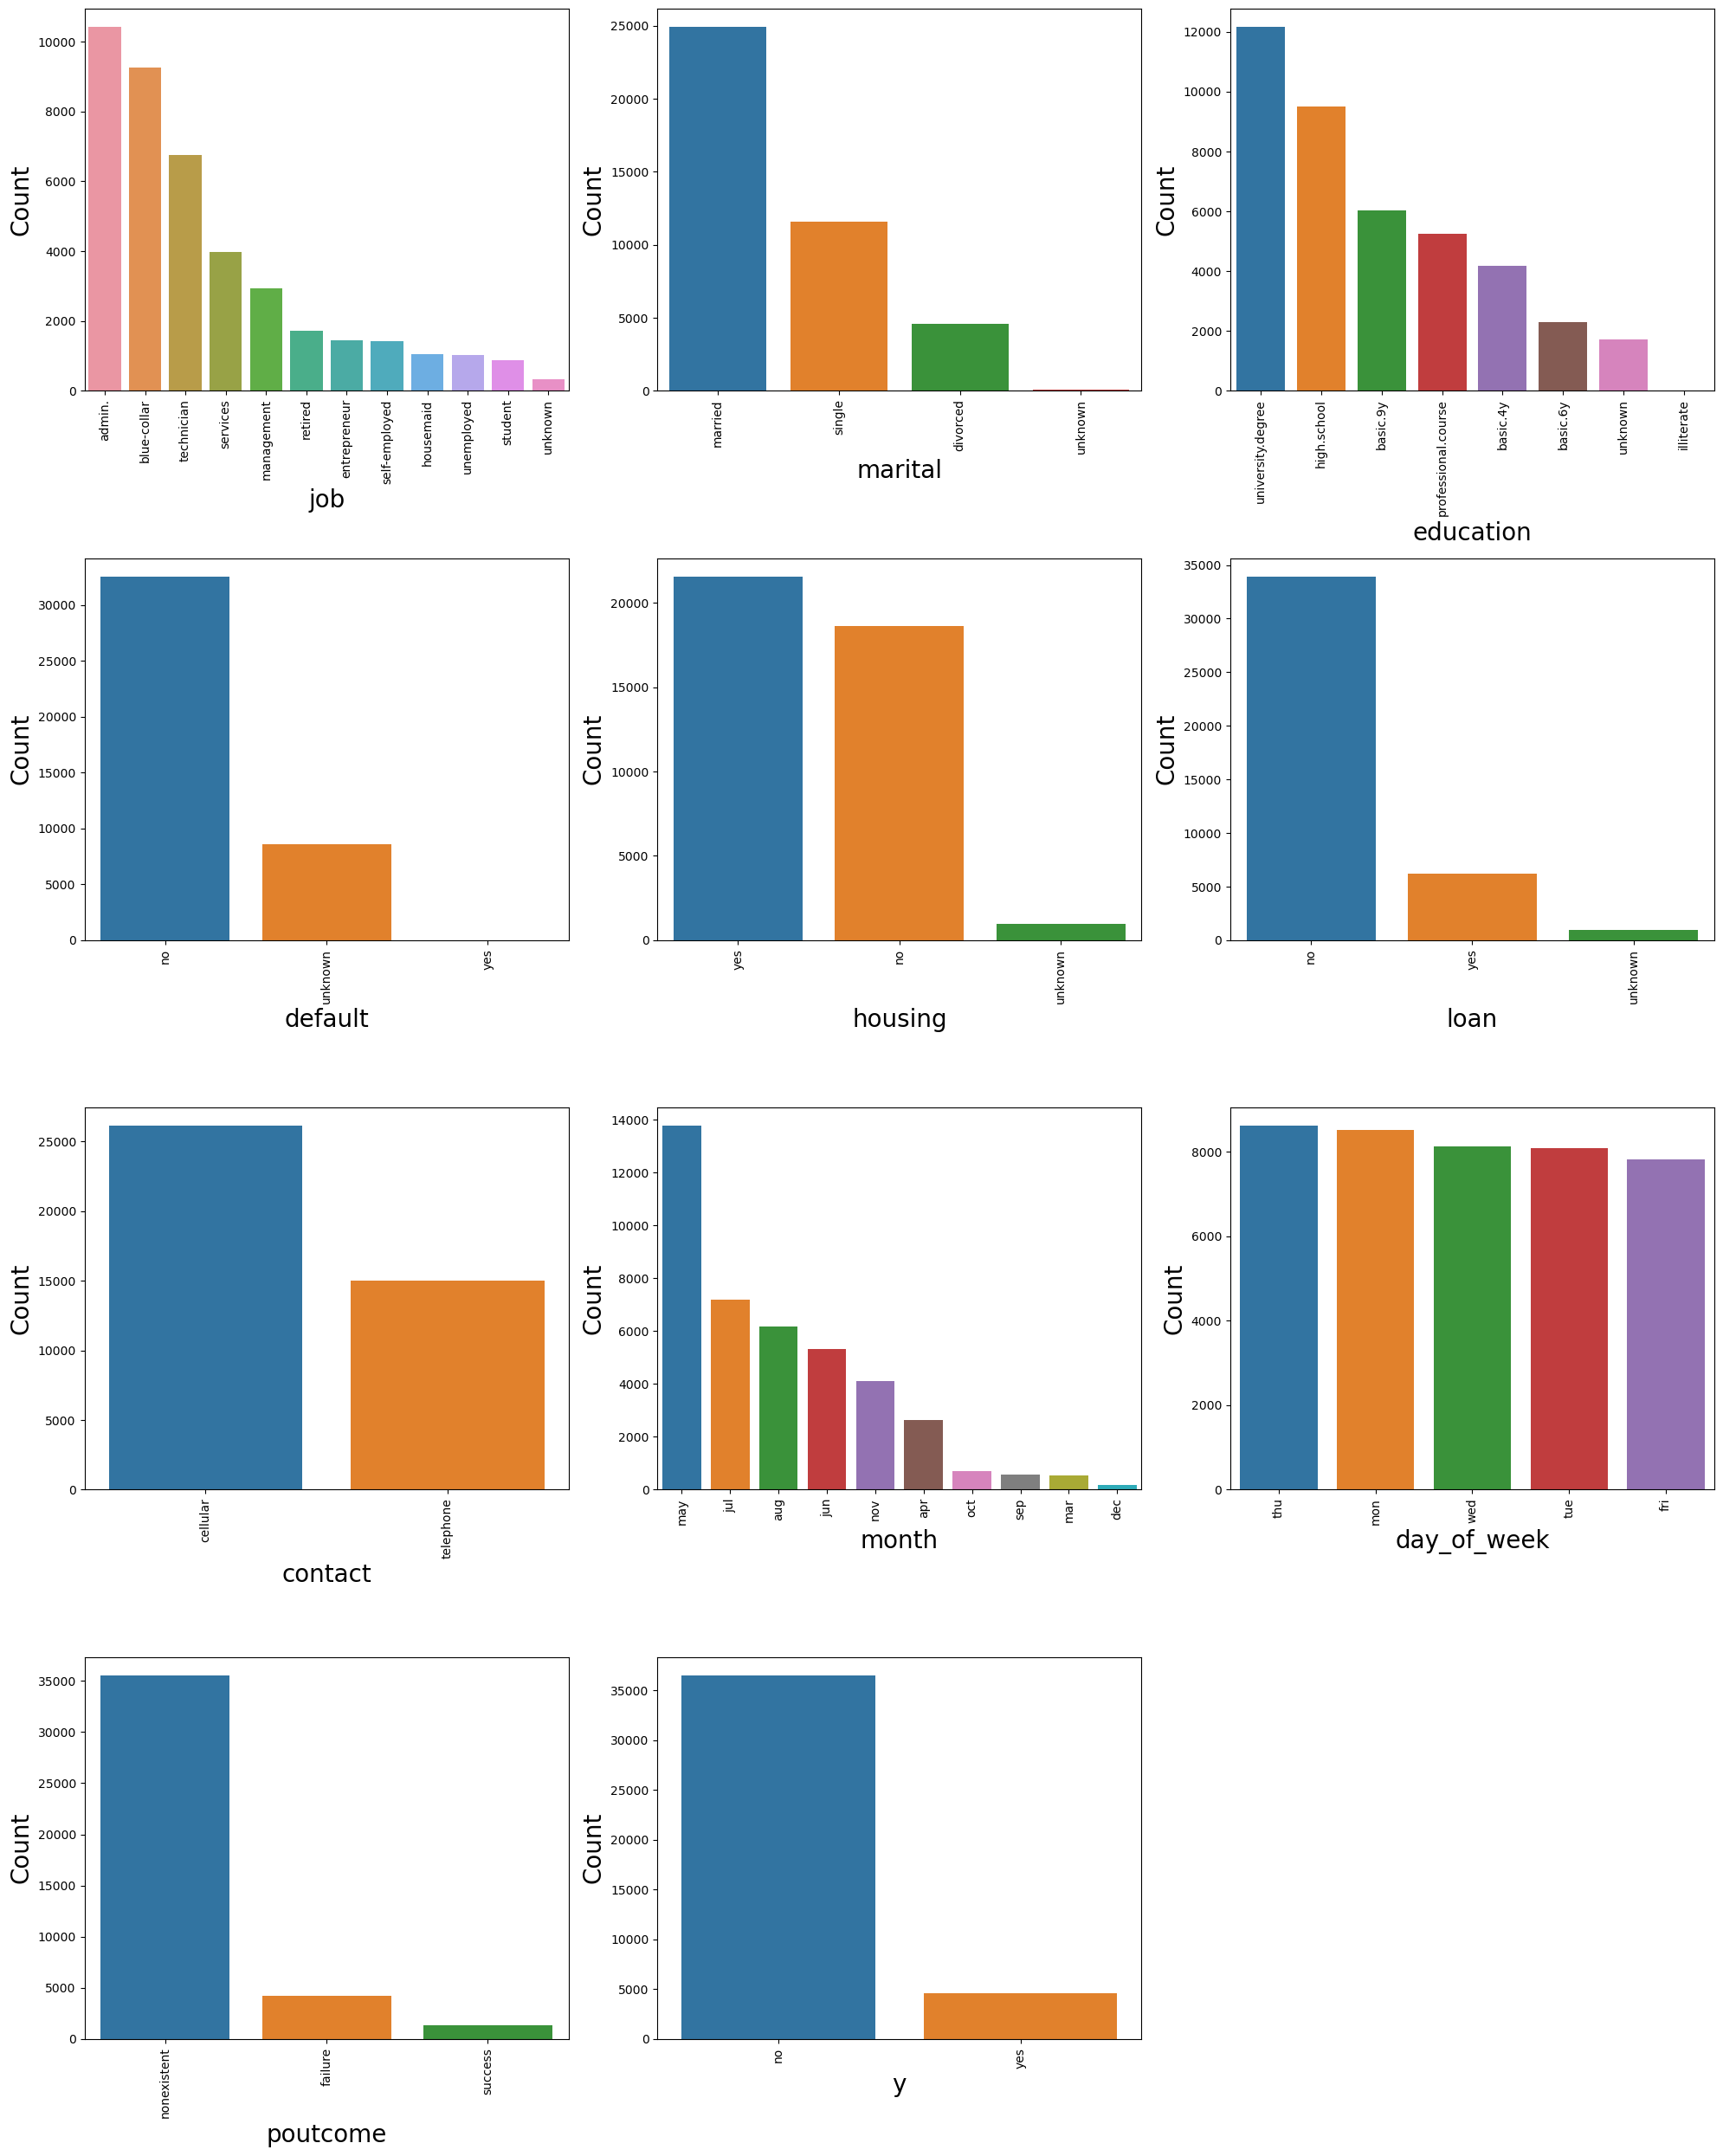

In [16]:
#Barplot
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1
for column in cat_data:
    ax = plt.subplot(4, 3, plotnumber)
    order = cat_data[column].value_counts().index
    sns.barplot(y=cat_data[column].value_counts().values, x=order)
    plt.ylabel("Count", fontsize=20)
    plt.xlabel(column, fontsize=20)
    plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Our Insights:
### Insigts for jobs:
* "Admin" is the most common occupation among bank customers, with 10,422 instances.
* "Blue-collar" and "technician" are the second and third most prevalent occupations, 
  with 9,254 and 6,743 instances, respectively.
* "Students" represent a smaller portion of bank customers, with 875 instances.
* Occupations such as "management," "retired," "entrepreneur," and "self-employed" fall in between,
  with varying levels of frequency in the dataset.

### Insight for marital:
* "Married" is the most common marital status, with 24,928 instances.
* "Single" is the second most prevalent marital status, with 11,568 instances.
* "Divorced" is another common status, with 4,612 instances.
* A small number of customers (80 instances) have an "unknown" marital status, 
  indicating missing or unidentified information.

### Insight for education:
* "University degree" is the most common education level, with 12,168 instances.
* "High school" education is the second most prevalent, with 9,515 instances.
* "Basic 9 years" and "Professional course" represent significant segments, 
   with 6,045 and 5,243 instances, respectively.
* There are smaller numbers of customers with "basic 4 years," "basic 6 years," "unknown," 
   and "illiterate" education levels.

### Insight for default:
* "No" is the most common default status, with 32,588 instances, indicating that the majority 
  of customers do not have a credit default history.
* "Unknown" represents another group of customers, with 8,597 instances, suggesting that there is 
  incomplete or unidentified information regarding their default status.

### Insight for house:
* "Yes" is the most common housing status, with 21,576 instances, indicating that a substantial 
  number of customers have housing loans.
* "No" represents another significant group, with 18,622 instances, suggesting that many 
  customers do not have housing loans.
* Additionally, there are 990 instances where the housing status is marked as "unknown," indicating 
  missing or unidentified information for a portion of the customers.

### Insight for loan:
* "No" is the most common loan status, with 33,950 instances, indicating that a majority 
  of customers do not have personal loans.
* "Yes" represents another group, with 6,248 instances, suggesting that a significant number of 
  customers have personal loans.
* Additionally, there are 990 instances where the loan status is marked as "unknown," indicating 
  missing or unidentified information for a portion of the customers.

### Insight for contact:
* "Cellular" is the most common contact method, with 26,144 instances, indicating that a majority
   of customers prefer to be contacted via cellular phones.
* "Telephone" represents another group, with 15,044 instances, suggesting that a significant number 
   of customers prefer to be contacted via traditional telephone methods.

### Insight for month:
* "May" has the highest number of customer interactions, with 13,769 instances, making it the busiest month.
* "July" is the second most active month, with 7,174 instances, followed closely by "August" with 6,178 instances.
* "December" has the fewest interactions, with only 182 instances, representing the least active month.
* Other months like "October," "September," "March," and "April" have intermediate levels of customer interactions, 
  ranging from 546 to 2,632 instances.

### Insight for days of week:
* "Thursday" (Thu) is the busiest day with 8,623 interactions.
* "Monday" (Mon) follows closely with 8,514 interactions.
* "Wednesday" (Wed) and "Tuesday" (Tue) have similar activity, around 8,000 interactions each.
* "Friday" (Fri) is the least busy weekday with 7,827 interactions. 

### Insight for poutcome:
* "Nonexistent" is the most common outcome, occurring 35,563 times, indicating that the majority 
   of customers did not participate in the previous marketing campaign.
* "Failure" is the second most prevalent outcome, with 4,252 instances, suggesting that a significant
   number of customers experienced a failed outcome in the previous campaign.
* "Success" represents a smaller subset, occurring 1,373 times, indicating that a relatively lower number 
   of customers achieved a successful outcome in the previous campaign.

### Insight for y (Target):
* "No" is the more prevalent outcome, with 36,548 instances, indicating that a majority of customers 
   did not subscribe to the bank's product..
* "Yes" represents the less common outcome, occurring 4,640 times, suggesting that a smaller number of 
   customers did subscribe to the bank's product or service.

## numerical data

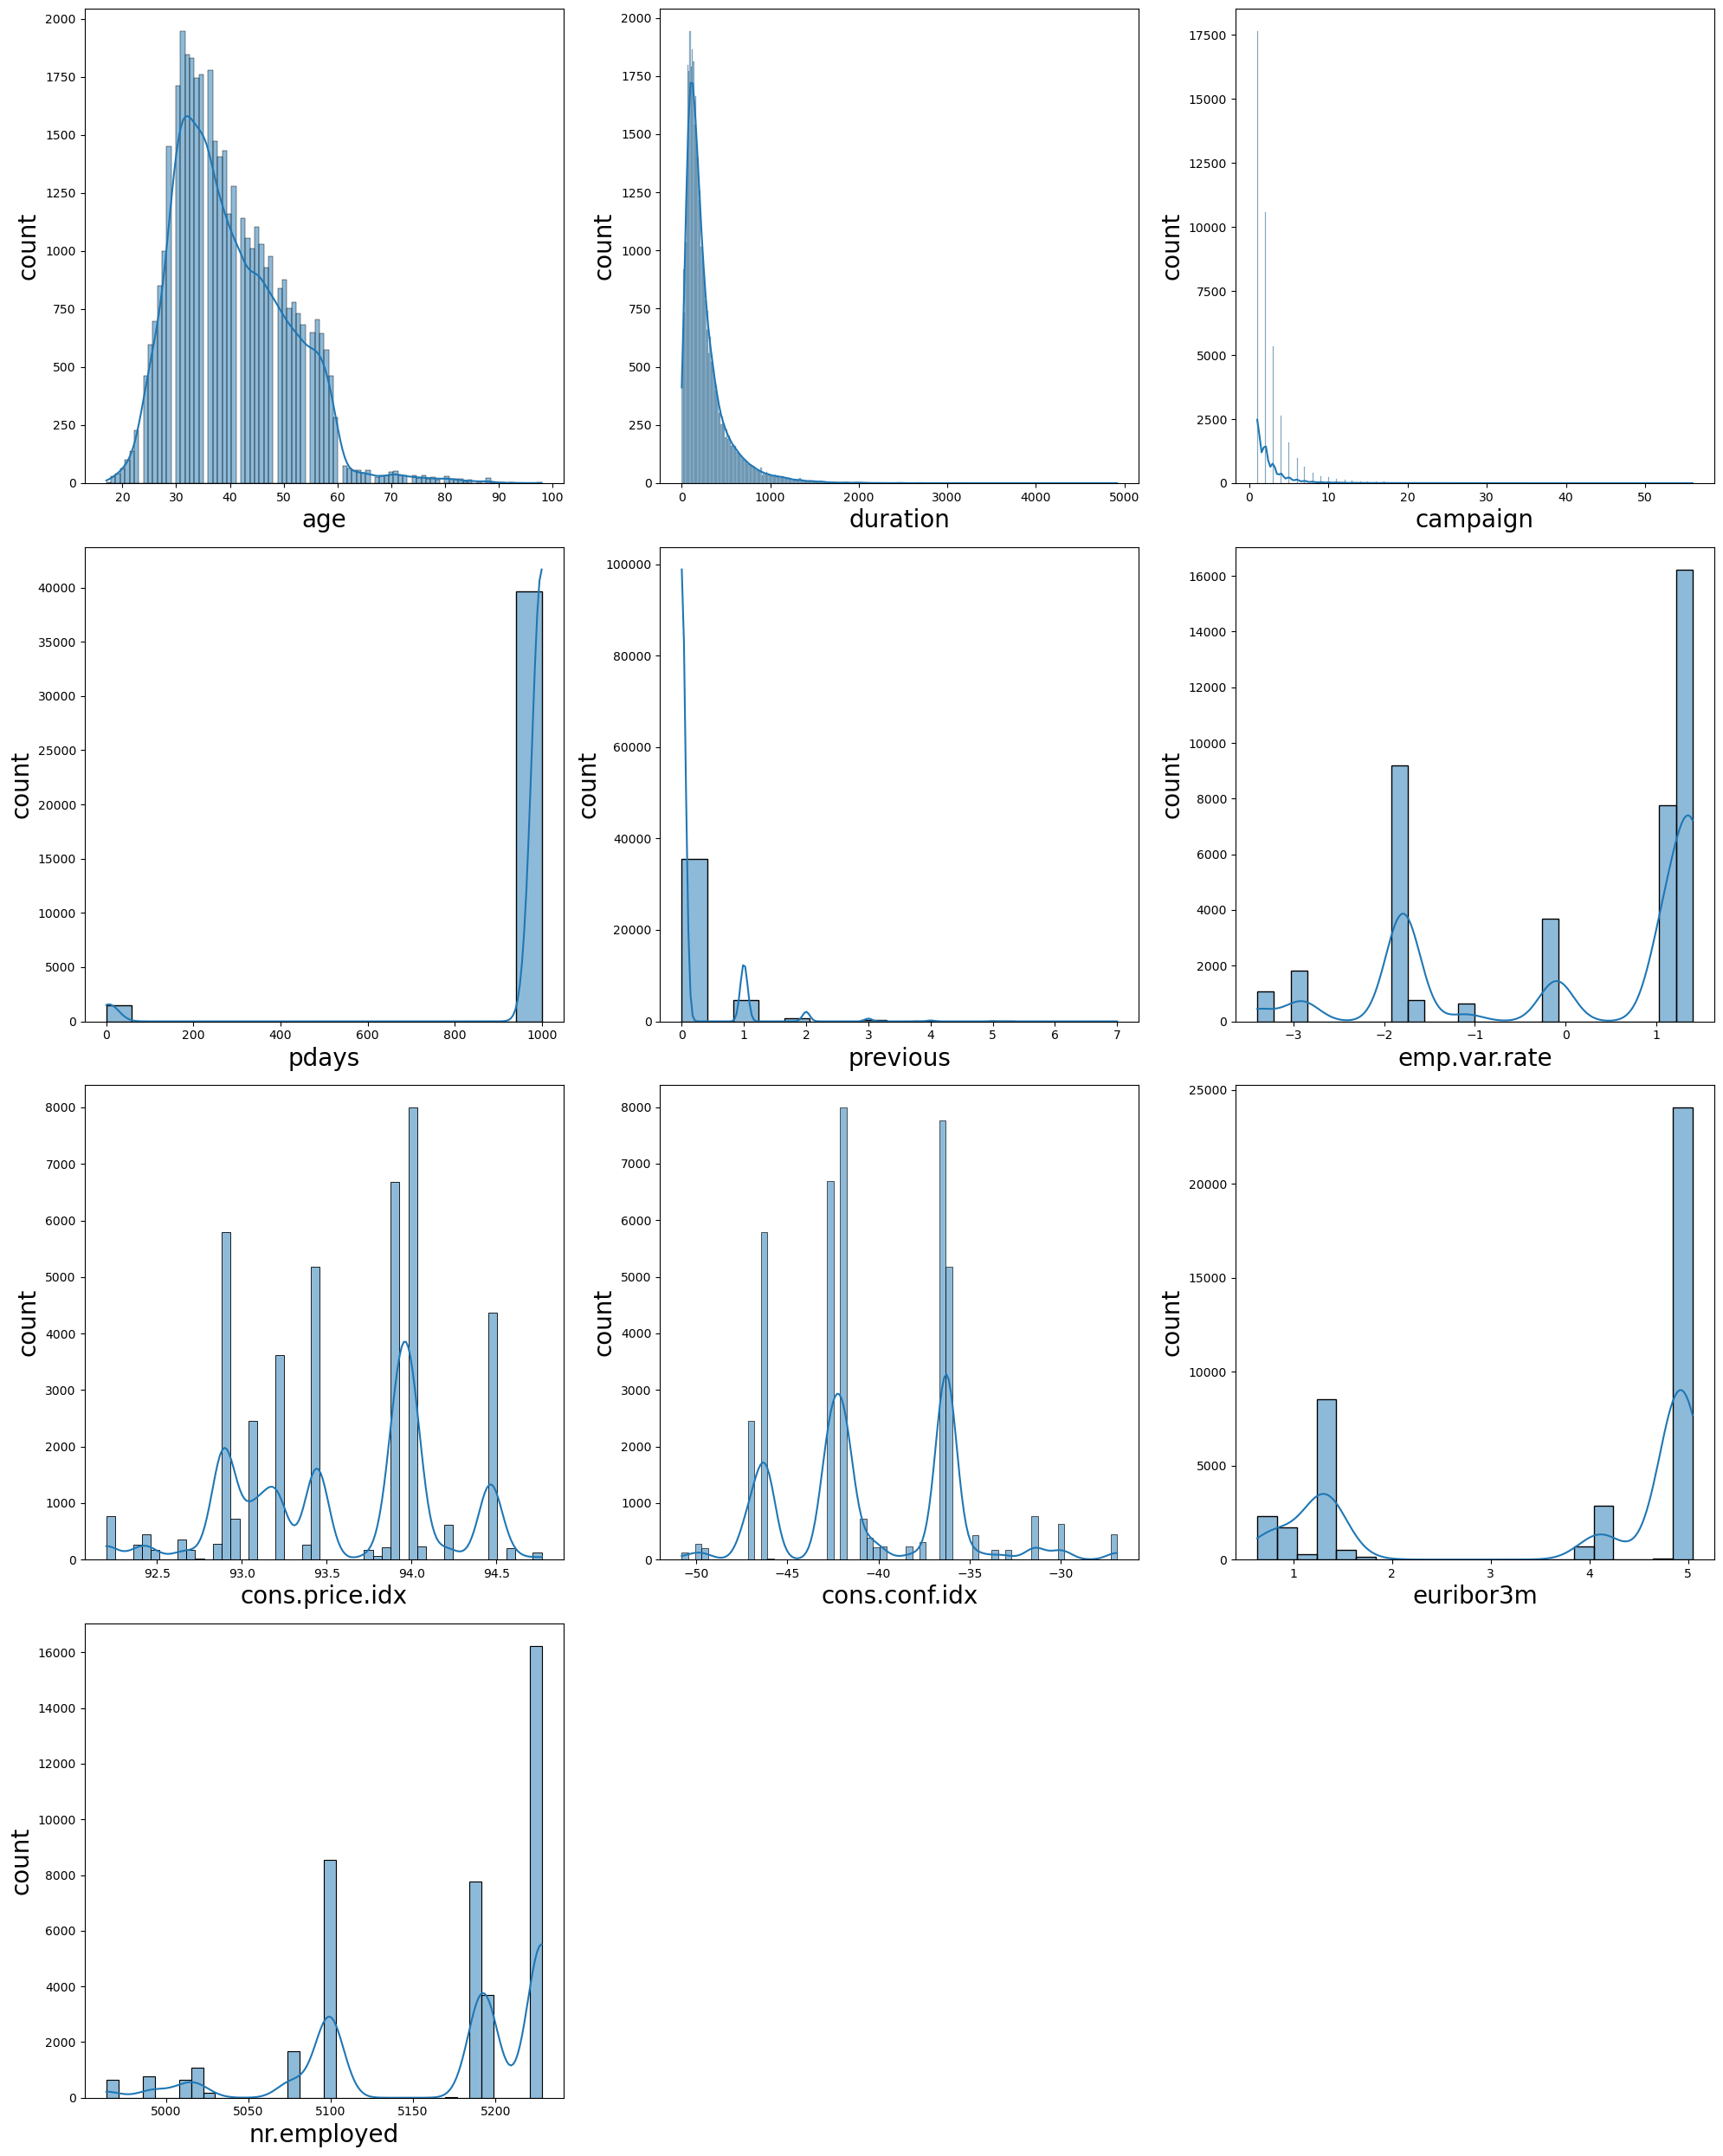

In [17]:
#Histplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_data:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

## Our Insights:
 * The features 'age,' 'duration,' 'campaign,' 'pdays,' 'previous,' 'emp.var.rate,' 'cons.price.idx,'
   'cons.conf.idx,' 'euribor3m,' and 'nr.employed' are all continuous numerical variables.
 * These numerical variables do not follow a simple normal distribution pattern and may have irregularities, 
   peaks, or valleys in their distributions.
 * The feature 'pdays' distribution is heavily right-skewed, with the mode at 999 (occurring 39,673 times) and a 
   long tail of infrequently occurring values, including some outliers.
 * The  feature 'previous' represents a highly imbalanced distribution, with the majority of values (0) occurring 
   35,563 times, while other values (1, 2, 3, 4, 5, 6, 7) are relatively rare, suggesting a class imbalance issue

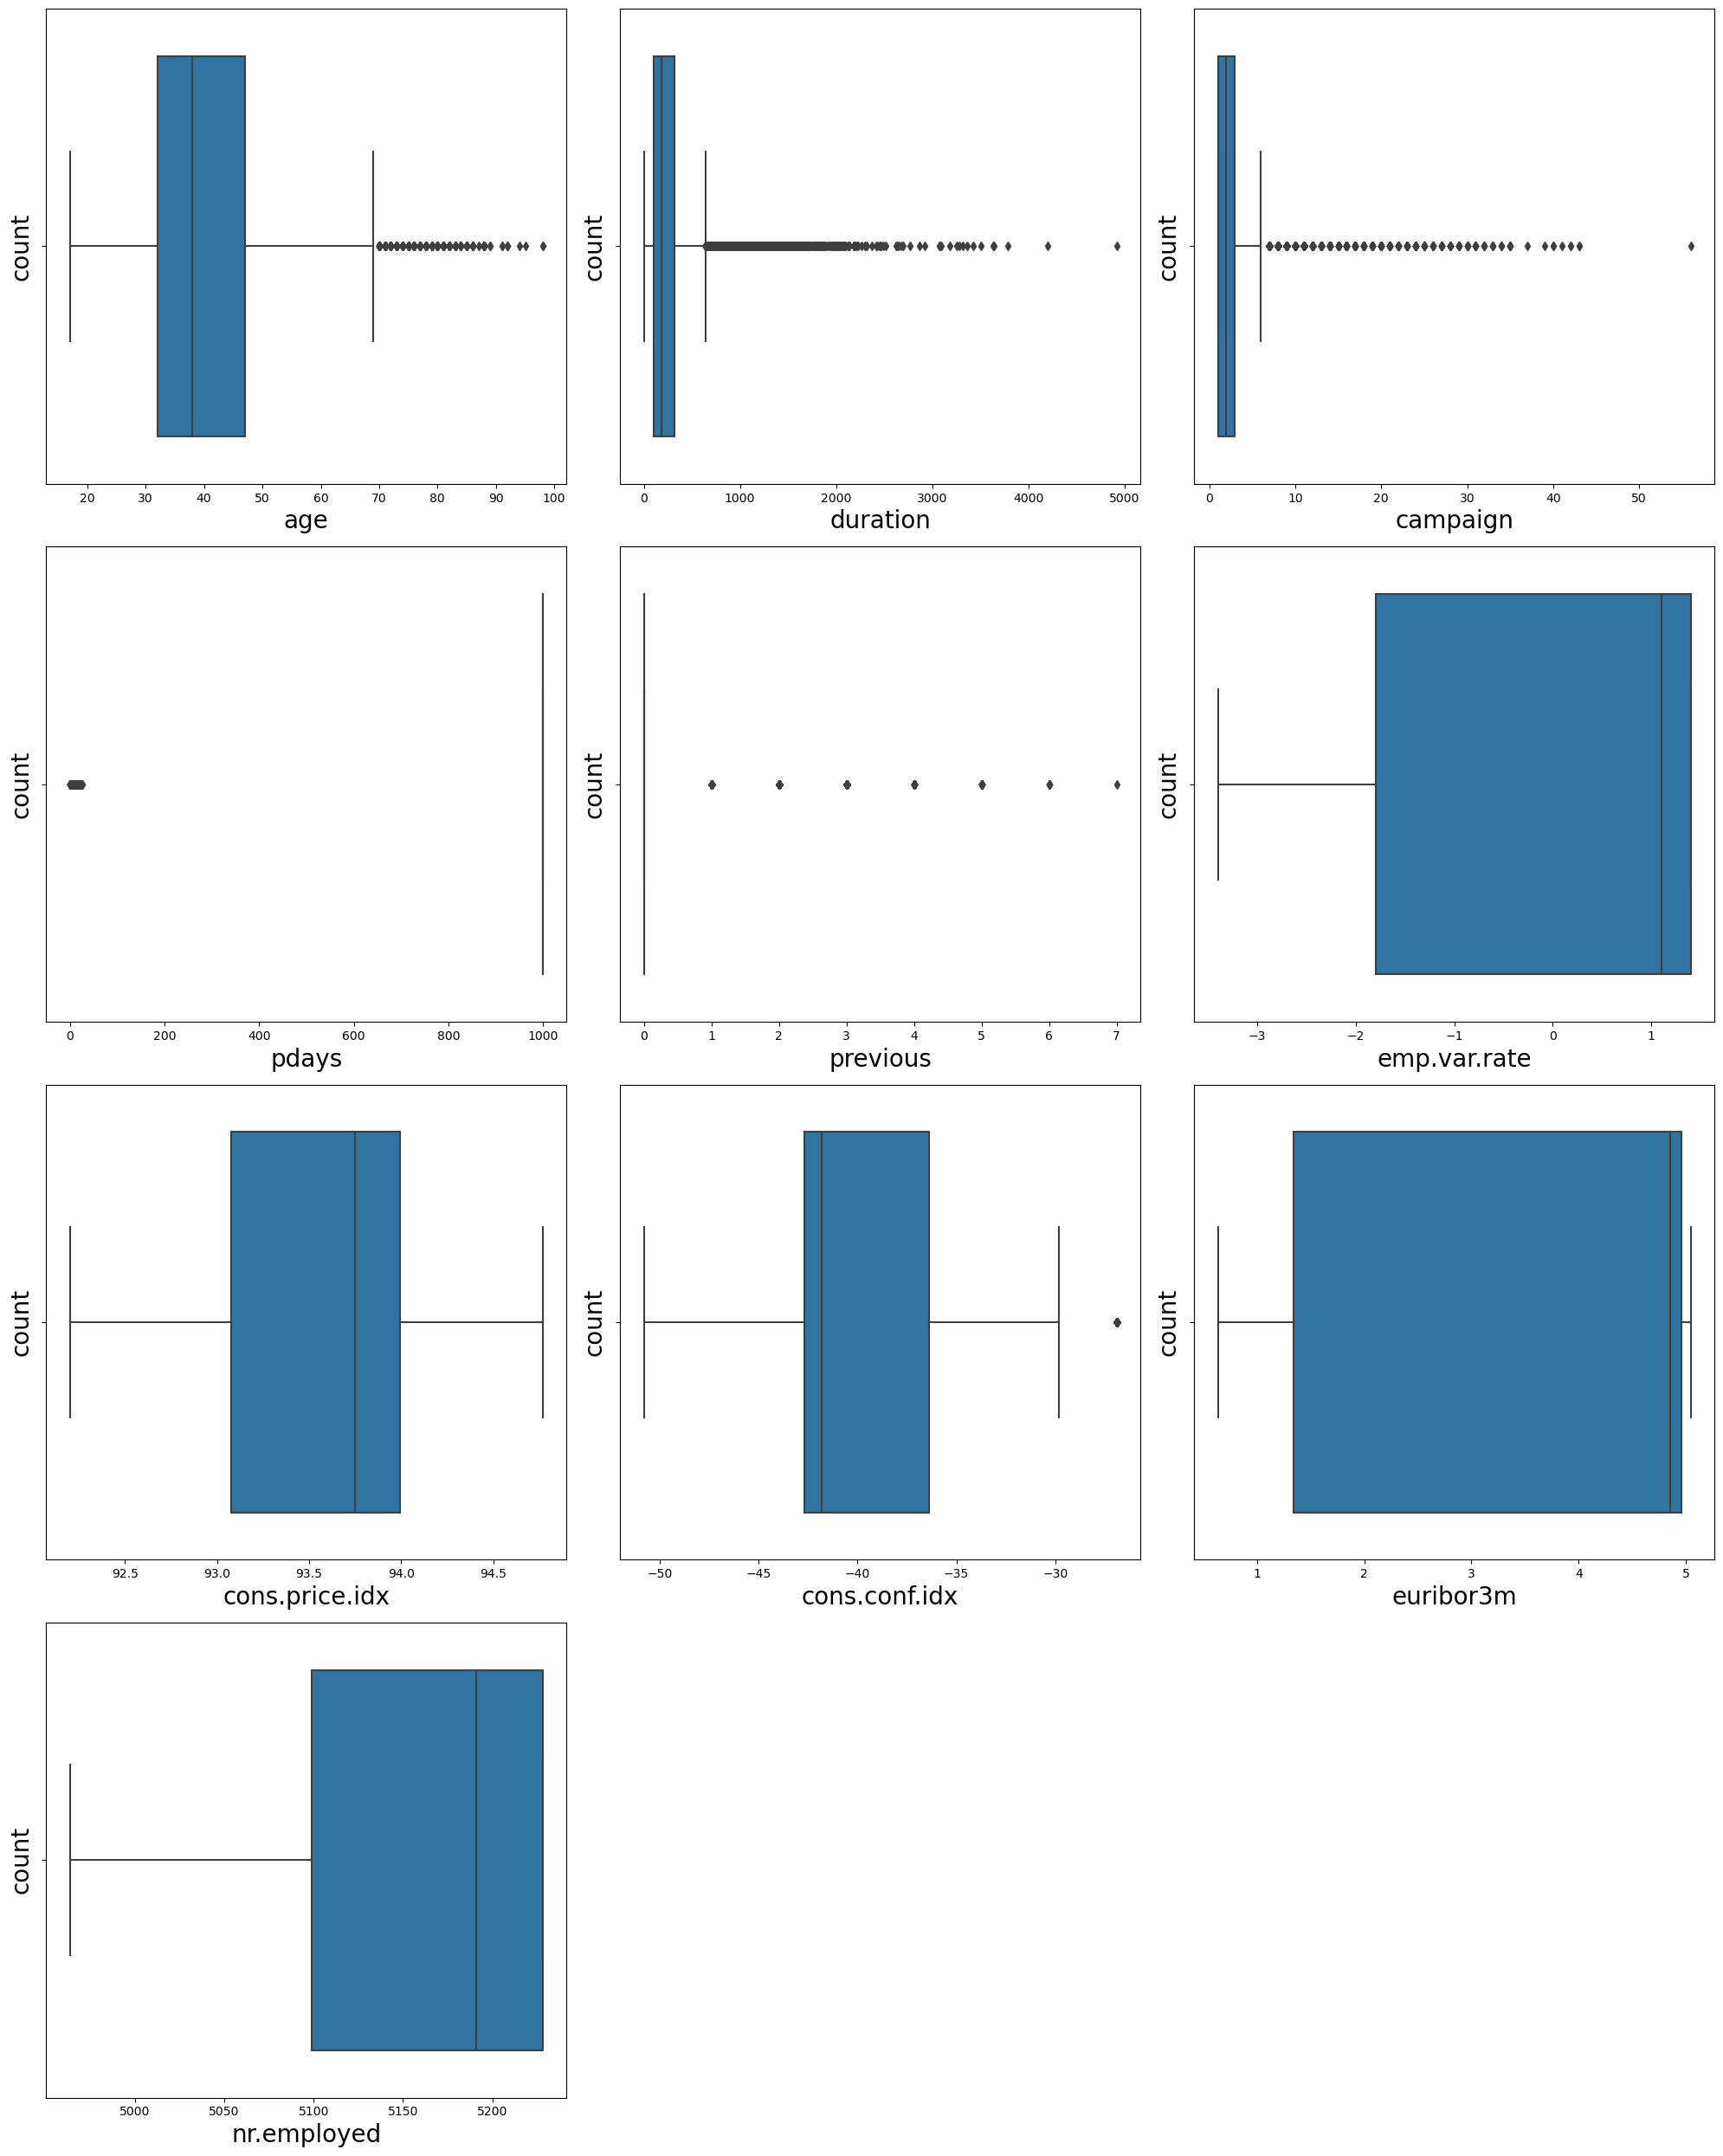

In [18]:
#Boxtplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_data:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

## Our Insights:
* Upon evaluating box plots for the numerical columns age,duration,campaign,previous,and cons.conf.idx outliers
  were identified.
* Outliers in 'age' may signify extreme age values, while 'duration' outliers might indicate exceptionally long or 
  short contact durations. In 'campaign,' outliers could imply an unusually high number of contacts with specific 
  clients. Furthermore, outliers in 'cons.price.idx' and 'cons.conf.idx' may suggest uncommon consumer price
  and confidence index values. 
* It's essential to note that the absence of outliers in the remaining columns (pdays,emp.var.rate,euribor3m,
  nr.employed).

# Bivariate Analysis

In [19]:
cat_data.drop('y',axis=1,inplace= True)

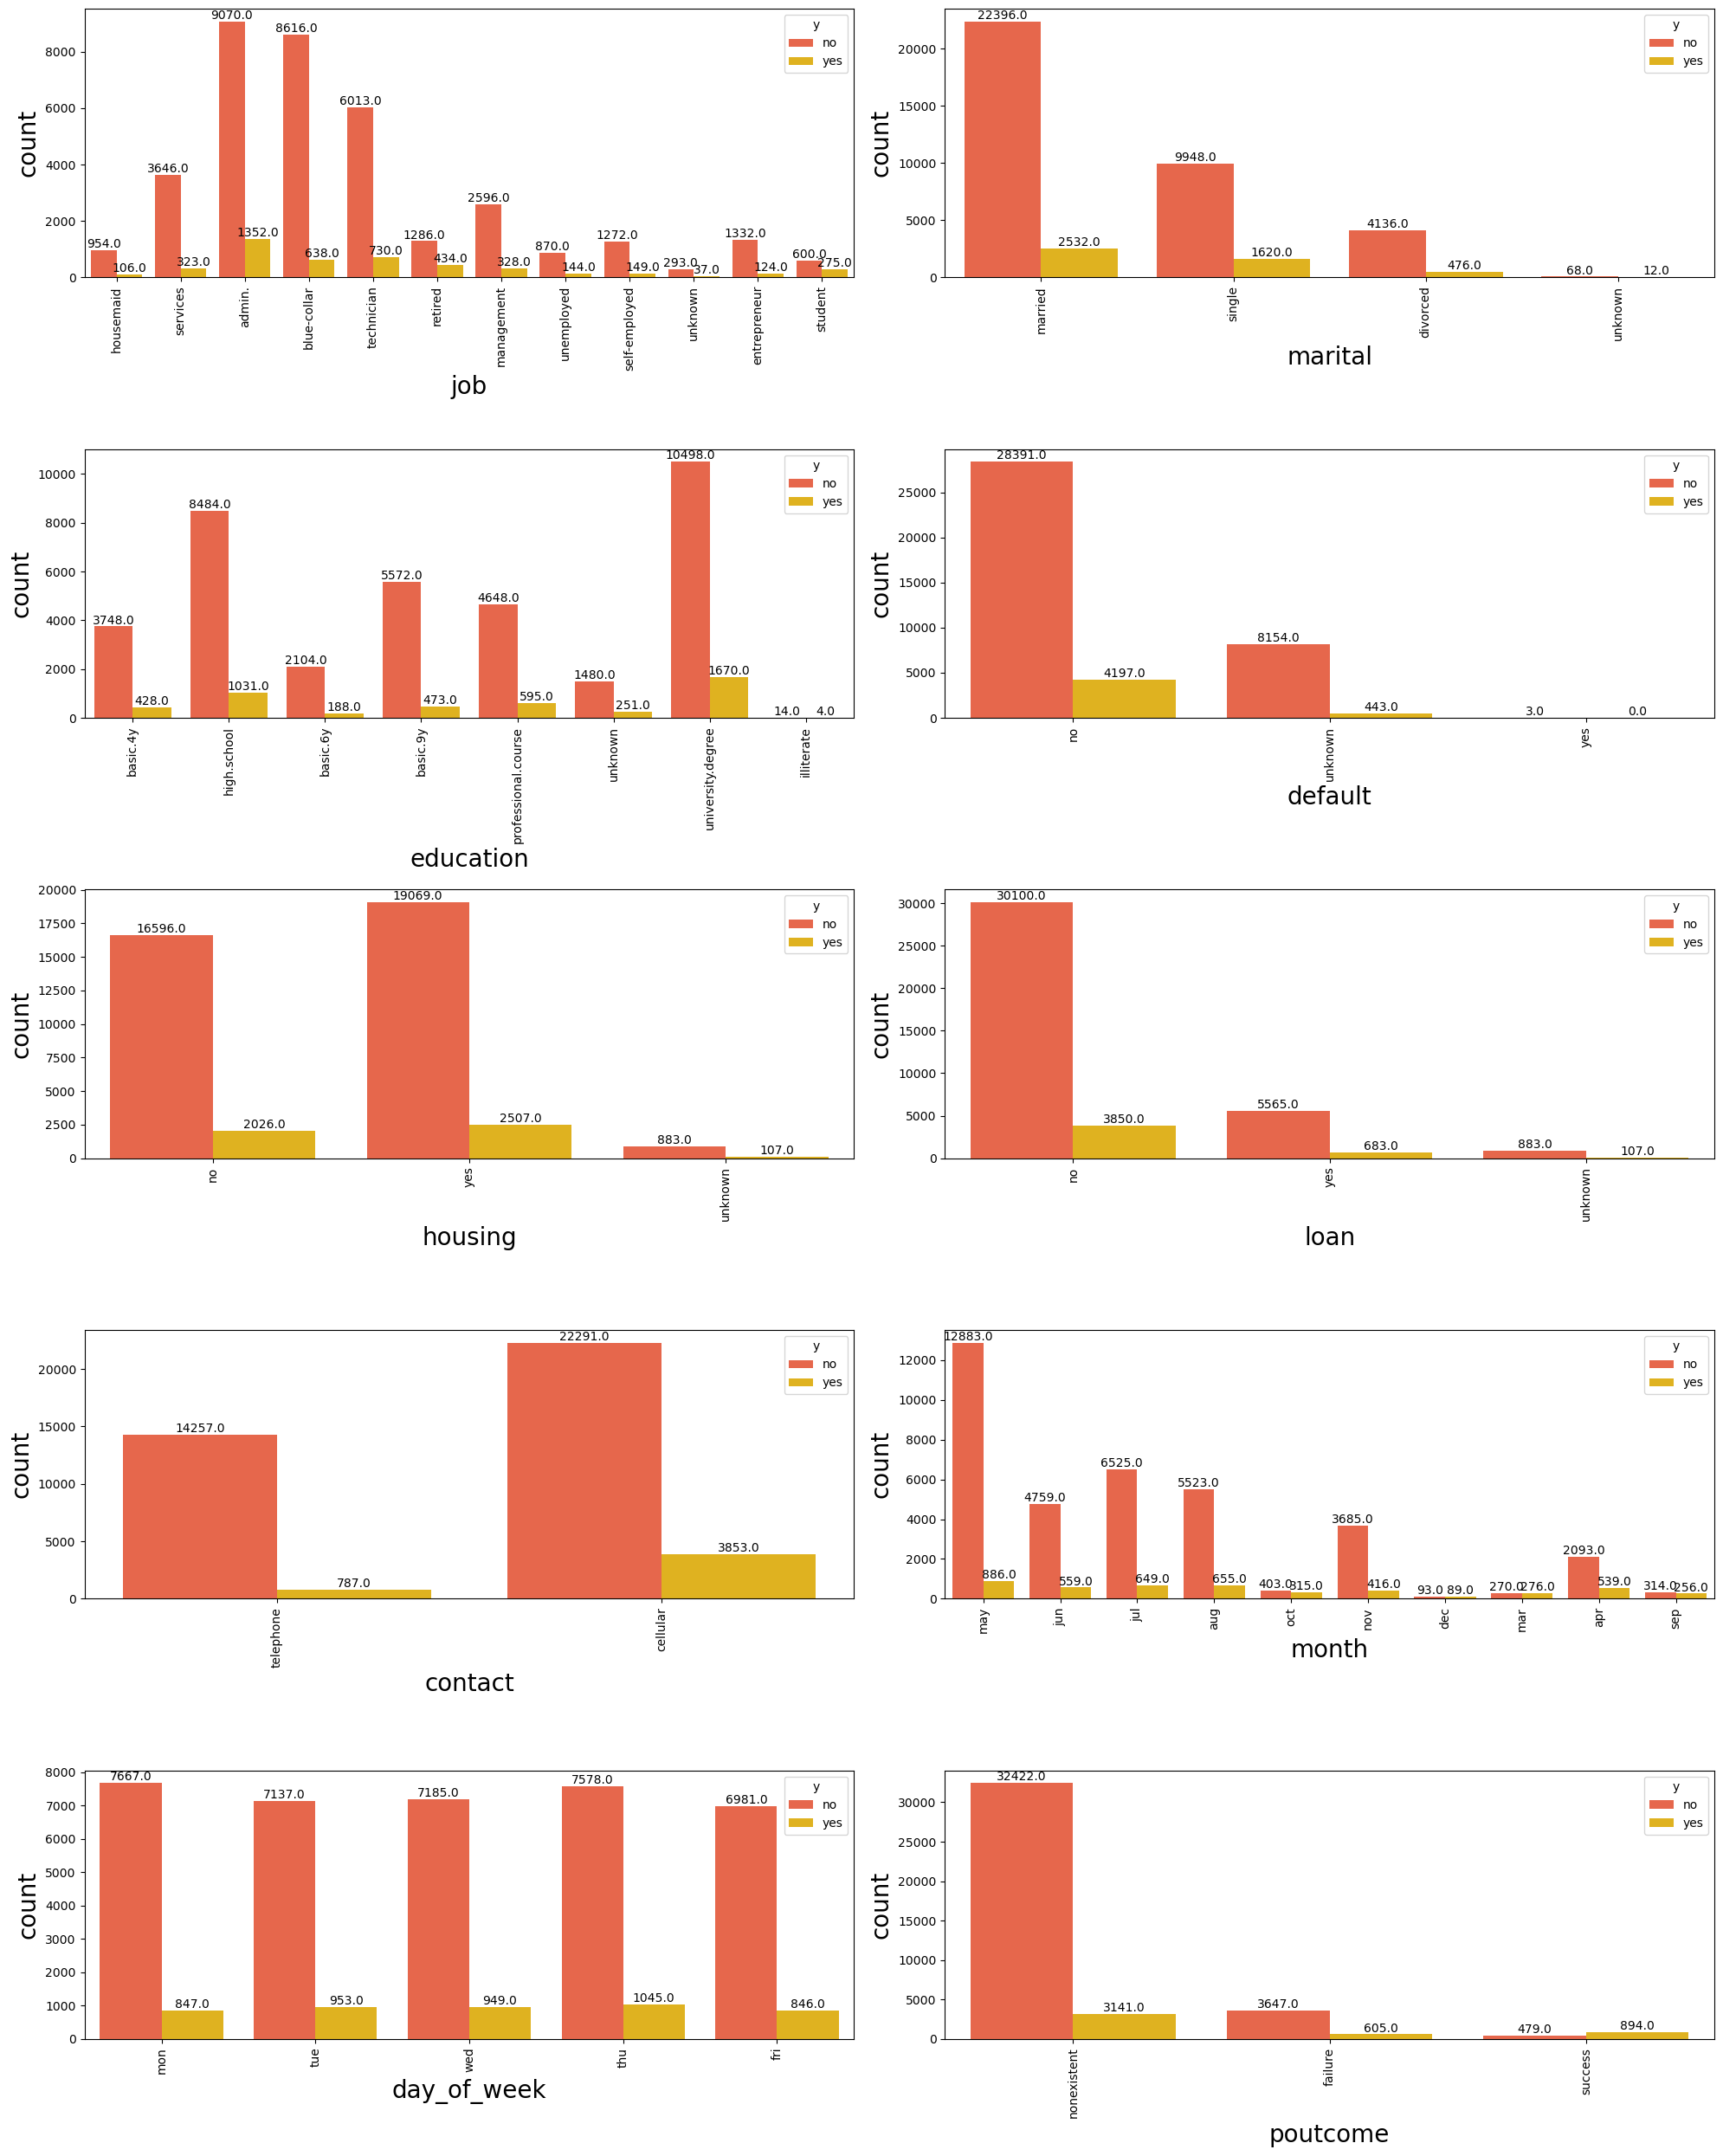

In [20]:
# Count plot
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1
custom_palette = ["#FF5733", "#FFC300", "#FF5733"]
for column in cat_data:
    ax = plt.subplot(5, 2, plotnumber)
    sns.set_palette(custom_palette)
    sns.countplot(x=data[column], hue=data['y'])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(column, fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.xticks(rotation=90)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Our Insights:
### Insight for jobs:
* Admin: Total - 10,422 individuals, Subscribed (yes) - 1,352, Not Subscribed (no) - 9,070.
* Blue-collar: Total - 9,254 individuals, Subscribed (yes) - 638, Not Subscribed (no) - 8,616.
* Technician: Total - 6,743 individuals, Subscribed (yes) - 730, Not Subscribed (no) - 6,013.
* Services: Total - 3,969 individuals, Subscribed (yes) - 323, Not Subscribed (no) - 3,646.
* Management: Total - 2,924 individuals, Subscribed (yes) - 328, Not Subscribed (no) - 2,596.
* Retired: Total - 1,720 individuals, Subscribed (yes) - 423, Not Subscribed (no) - 1,297.
* Entrepreneur: Total - 1,456 individuals, Subscribed (yes) - 124, Not Subscribed (no) - 1,332.
* Self-employed: Total - 1,421 individuals, Subscribed (yes) - 149, Not Subscribed (no) - 1,272.
* Housemaid: Total - 1,060 individuals, Subscribed (yes) - 106, Not Subscribed (no) - 954.
* Unemployed: Total - 1,014 individuals, Subscribed (yes) - 144, Not Subscribed (no) - 870.
* Student: Total - 875 individuals, Subscribed (yes) - 275, Not Subscribed (no) - 600.
* Unknown: Total - 330 individuals, Subscribed (yes) - 37, Not Subscribed (no) - 293.
### Insight for marital:
* Married: Total - 24,928 individuals, Subscribed (yes) - 2,532, Not Subscribed (no) - 22,390.
* Single: Total - 11,568 individuals, Subscribed (yes) - 1,620, Not Subscribed (no) - 9,948.
* Divorced: Total - 4,612 individuals, Subscribed (yes) - 476, Not Subscribed (no) - 4,136.
* Unknown: Total - 80 individuals, Subscribed (yes) - 12, Not Subscribed (no) - 68.

### Insight for education:
* Among customers with a "university degree" education, there are 12,168 individuals, with 1,670 subscribing (yes) and 10,498 not subscribing (no). For customers with a "high school" education, there are 9,515 individuals,with 1,031 subscribing (yes) and 8,484 not subscribing (no).
* Basic 9 years: 6,045 individuals, 476 subscribers (yes), 5,569 non-subscribers (no).
* Professional course: 5,243 individuals, 595 subscribers (yes), 4,648 non-subscribers (no).
* Basic 4 years: 4,176 individuals, 428 subscribers (yes), 3,748 non-subscribers (no).
* Basic 6 years: 2,292 individuals, 188 subscribers (yes), 2,104 non-subscribers (no).
* Unknown: 1,731 individuals, 251 subscribers (yes), 1,480 non-subscribers (no).
* Illiterate: 18 individuals, 4 subscribers (yes), 14 non-subscribers (no).

### Insight for default:
* no: Customers with 'No' credit default status - 32,588, Subscribed (yes) - 4,197,Not Subscribed (no) - 28,391.
* unknown: Customers with 'Unknown' credit default status - 8,597, Subscribed (yes) - 443, Not Subscribed (no) - 8,154.
* yes: Customers with 'Yes' credit default status - 3, Subscribed (yes) - 0, Not Subscribed (no) - 3.

### Insight for housing:
* housing loan-Yes: Total - 21,576, Subscribed (yes) - 2507, Not Subscribed (no) - 19,069
* housing loan-No: Total - 18,622, Subscribed (yes) - 2,026, Not Subscribed (no) - 16,596
* housing loan-Unknown: Total - 990, Subscribed (yes) - 107, Not Subscribed (no) - 883

### Insight for loan:
* Loan-No: Total - 33,950, Subscribed (yes) - 3,850, Not Subscribed (no) - 30,100
* Loan-Yes: Total - 6,248, Subscribed (yes) - 683, Not Subscribed (no) - 5,565
* Loan-Unknown: Total - 990, Subscribed (yes) - 107, Not Subscribed (no) - 883

### Insight for contact:
* Cellular: Total - 26,144, Subscribed (yes) - 3,853, Not Subscribed (no) - 22,291
* Telephone: Total - 15,044, Subscribed (yes) - 787, Not Subscribed (no) - 14,257

### Insight for month:
* May: Total - 13,769, Subscribed (yes) - 886, Not Subscribed (no) - 12,883
* Jul: Total - 7,174, Subscribed (yes) - 649, Not Subscribed (no) - 6,525
* Aug: Total - 6,178, Subscribed (yes) - 655, Not Subscribed (no) - 5,523
* Jun: Total - 5,318, Subscribed (yes) - 559, Not Subscribed (no) - 4,759
* Nov: Total - 4,101, Subscribed (yes) - 416, Not Subscribed (no) - 3,685
* Apr: Total - 2,632, Subscribed (yes) - 539, Not Subscribed (no) - 2,093
* Oct: Total - 718, Subscribed (yes) - 315, Not Subscribed (no) - 403
* Sep: Total - 570, Subscribed (yes) - 256, Not Subscribed (no) - 314
* Mar: Total - 546, Subscribed (yes) - 276, Not Subscribed (no) - 270
* Dec: Total - 182, Subscribed (yes) - 89, Not Subscribed (no) - 93

### Insight for day_of_week:
* Thu: Total - 8,623, Subscribed (yes) - 1,045, Not Subscribed (no) - 7,578
* Mon: Total - 8,514, Subscribed (yes) - 847, Not Subscribed (no) - 7,667
* Wed: Total - 8,134, Subscribed (yes) - 949, Not Subscribed (no) - 7,185
* Tue: Total - 8,090, Subscribed (yes) - 953, Not Subscribed (no) - 7,137
* Fri: Total - 7,827, Subscribed (yes) - 846, Not Subscribed (no) - 6,981

### Insight for poutcome:
* Nonexistent: Total - 35,563, Subscribed (yes) - 3,141, Not Subscribed (no) - 32,422
* Failure: Total - 4,252, Subscribed (yes) - 605, Not Subscribed (no) - 3,647
* Success: Total - 1,373, Subscribed (yes) - 894, Not Subscribed (no) - 479

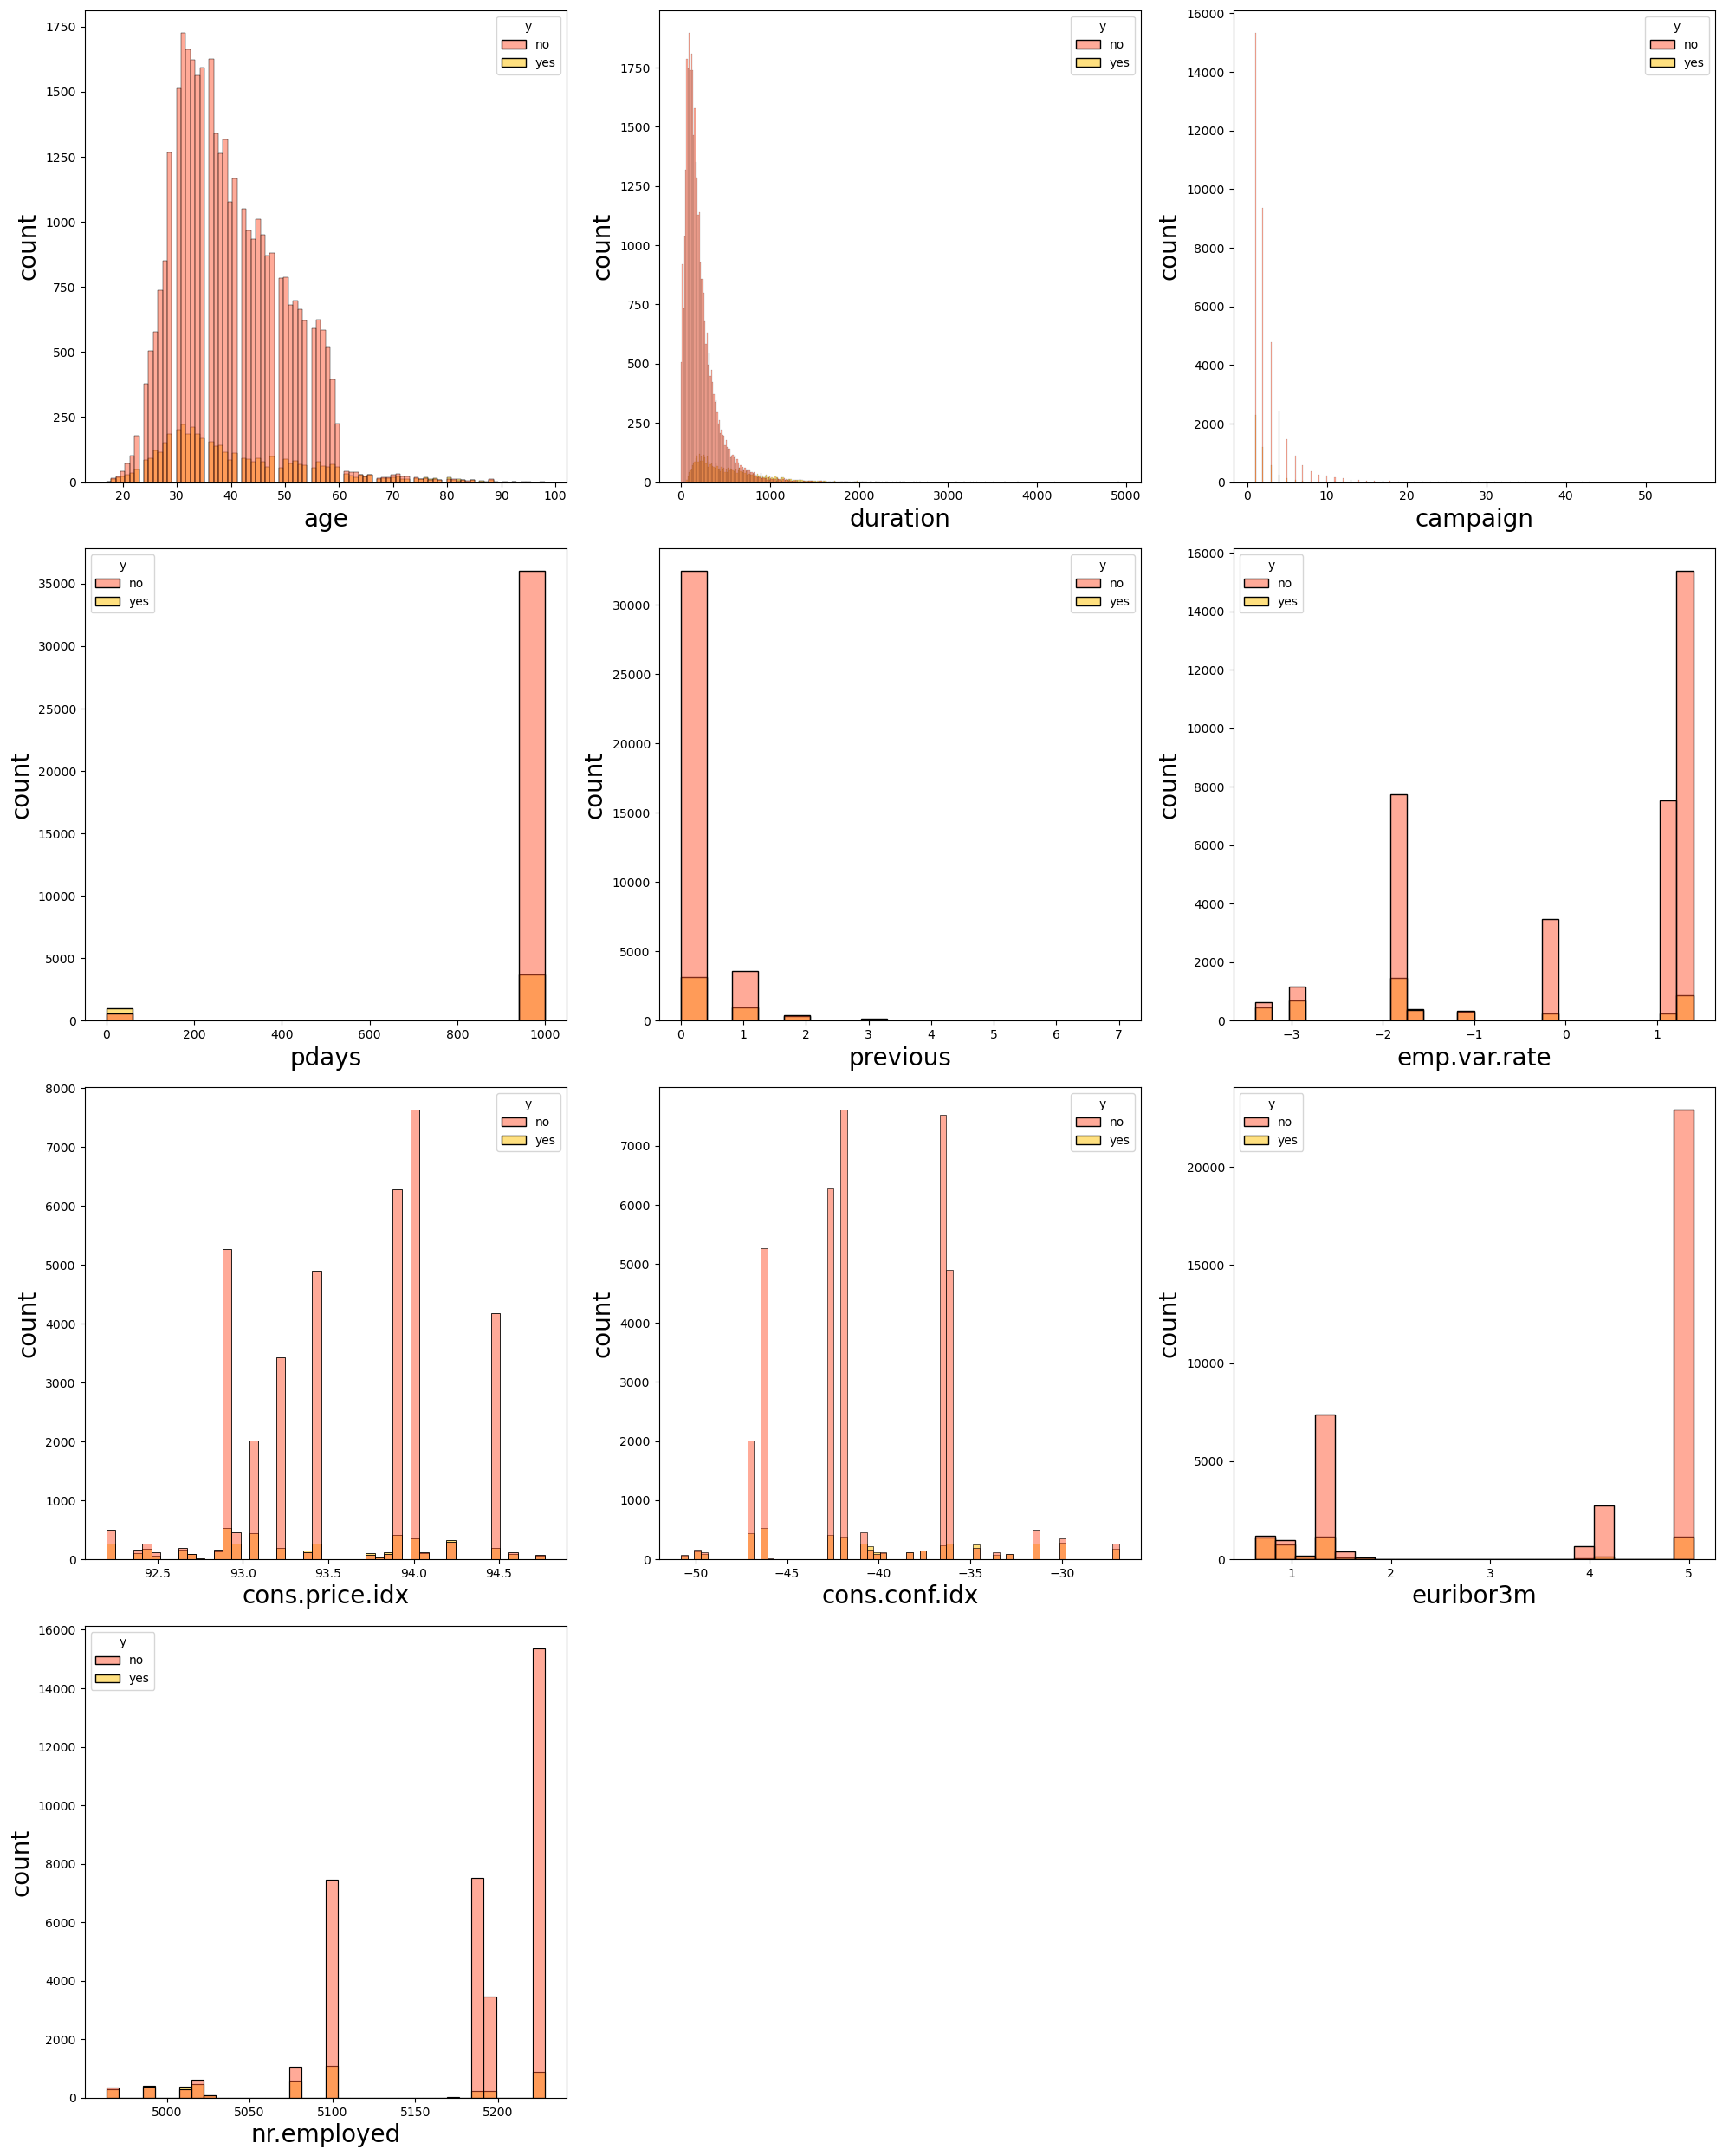

In [21]:
#histplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_data:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(x=data[column],hue=data['y'])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

## Our Insights:
*  When plotting histograms for the numerical columns (age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,
   cons.conf.idx,euribor3m,nr.employed) with a binary target variable.
*  For the 'Yes' group (target variable = 'yes'), the distribution shows [describe any observations 
   about the distribution, such as shape, peaks, or central tendency].
* For the 'No' group (target variable = 'no'), the distribution exhibits [describe any observations 
   about this distribution].
* This visualization allows us to compare the age distributions for both 'Yes' and 'No' groups, providing 
  insights into how age may be related to the binary target variable.

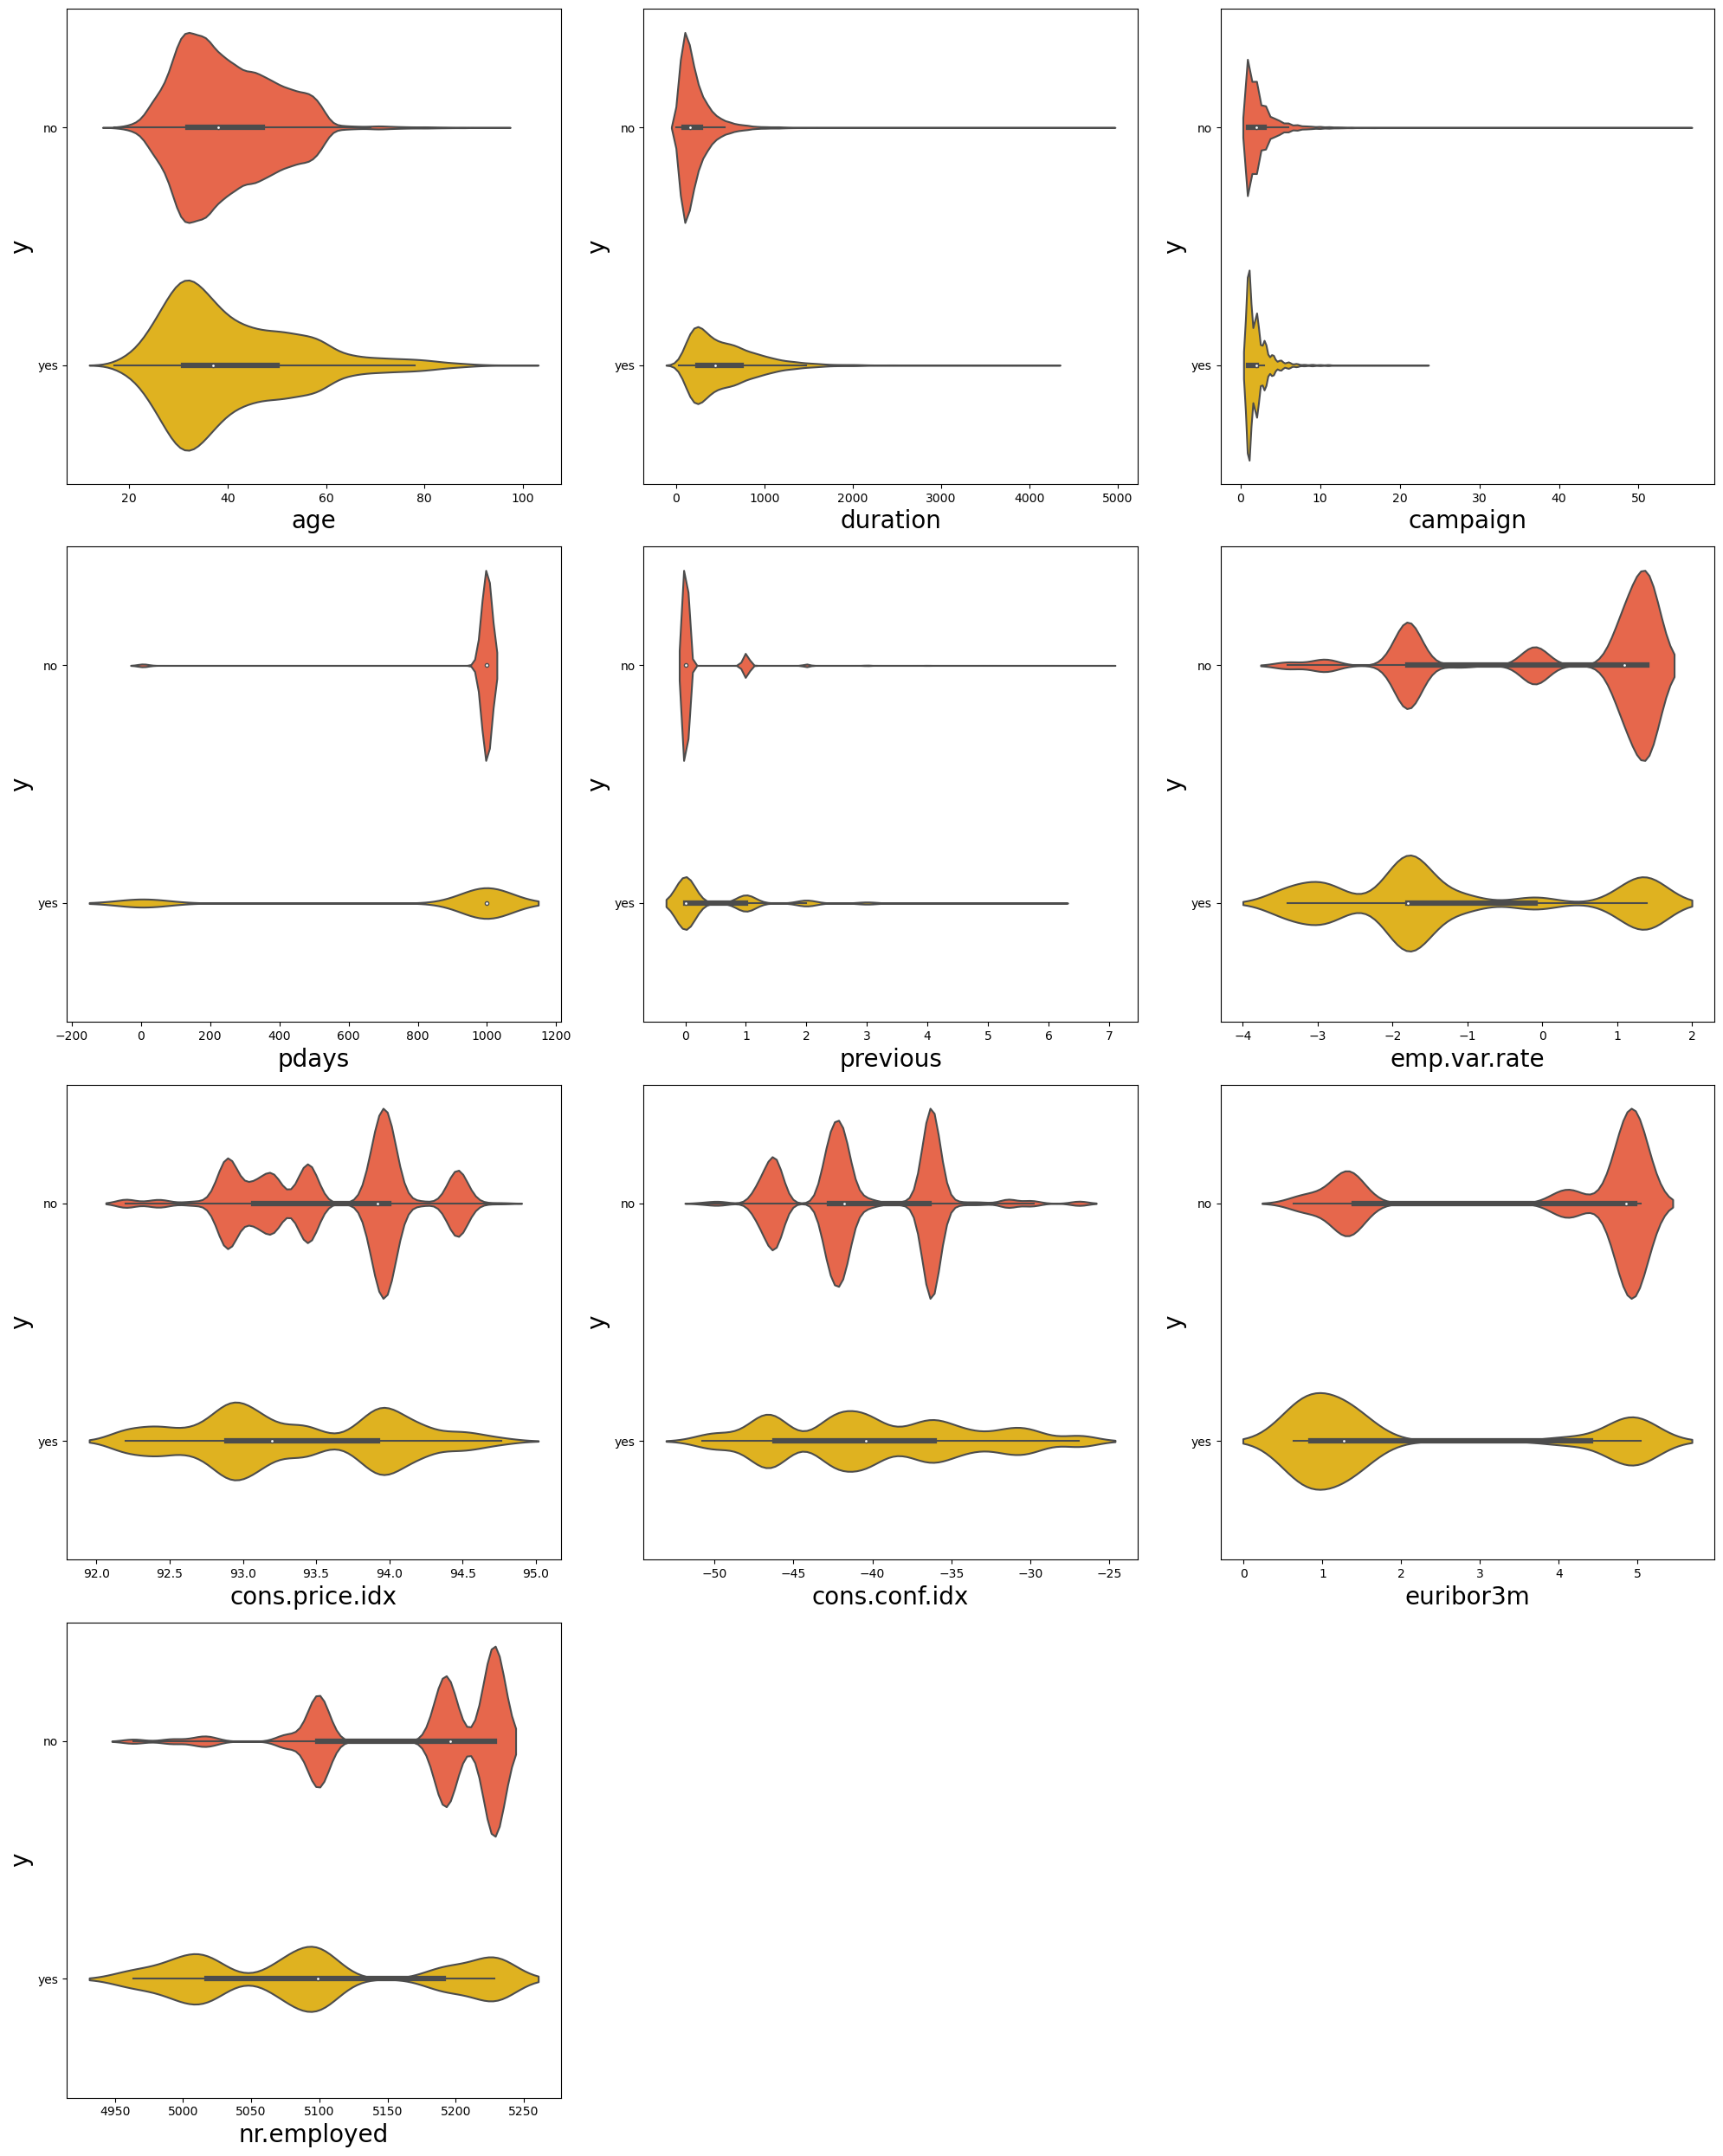

In [22]:
#violinplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_data:
    ax=plt.subplot(4,3,plotnumber)
    sns.violinplot(x=data[column],y=data['y'])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('y',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

## Our Insights:
* In these violin plots, the distribution of the numerical column is visualized for the 'Yes' and 'No' 
target values, allowing for a clear and comparative view of their respective distributions and variations.

# Mutlivariate Analysis

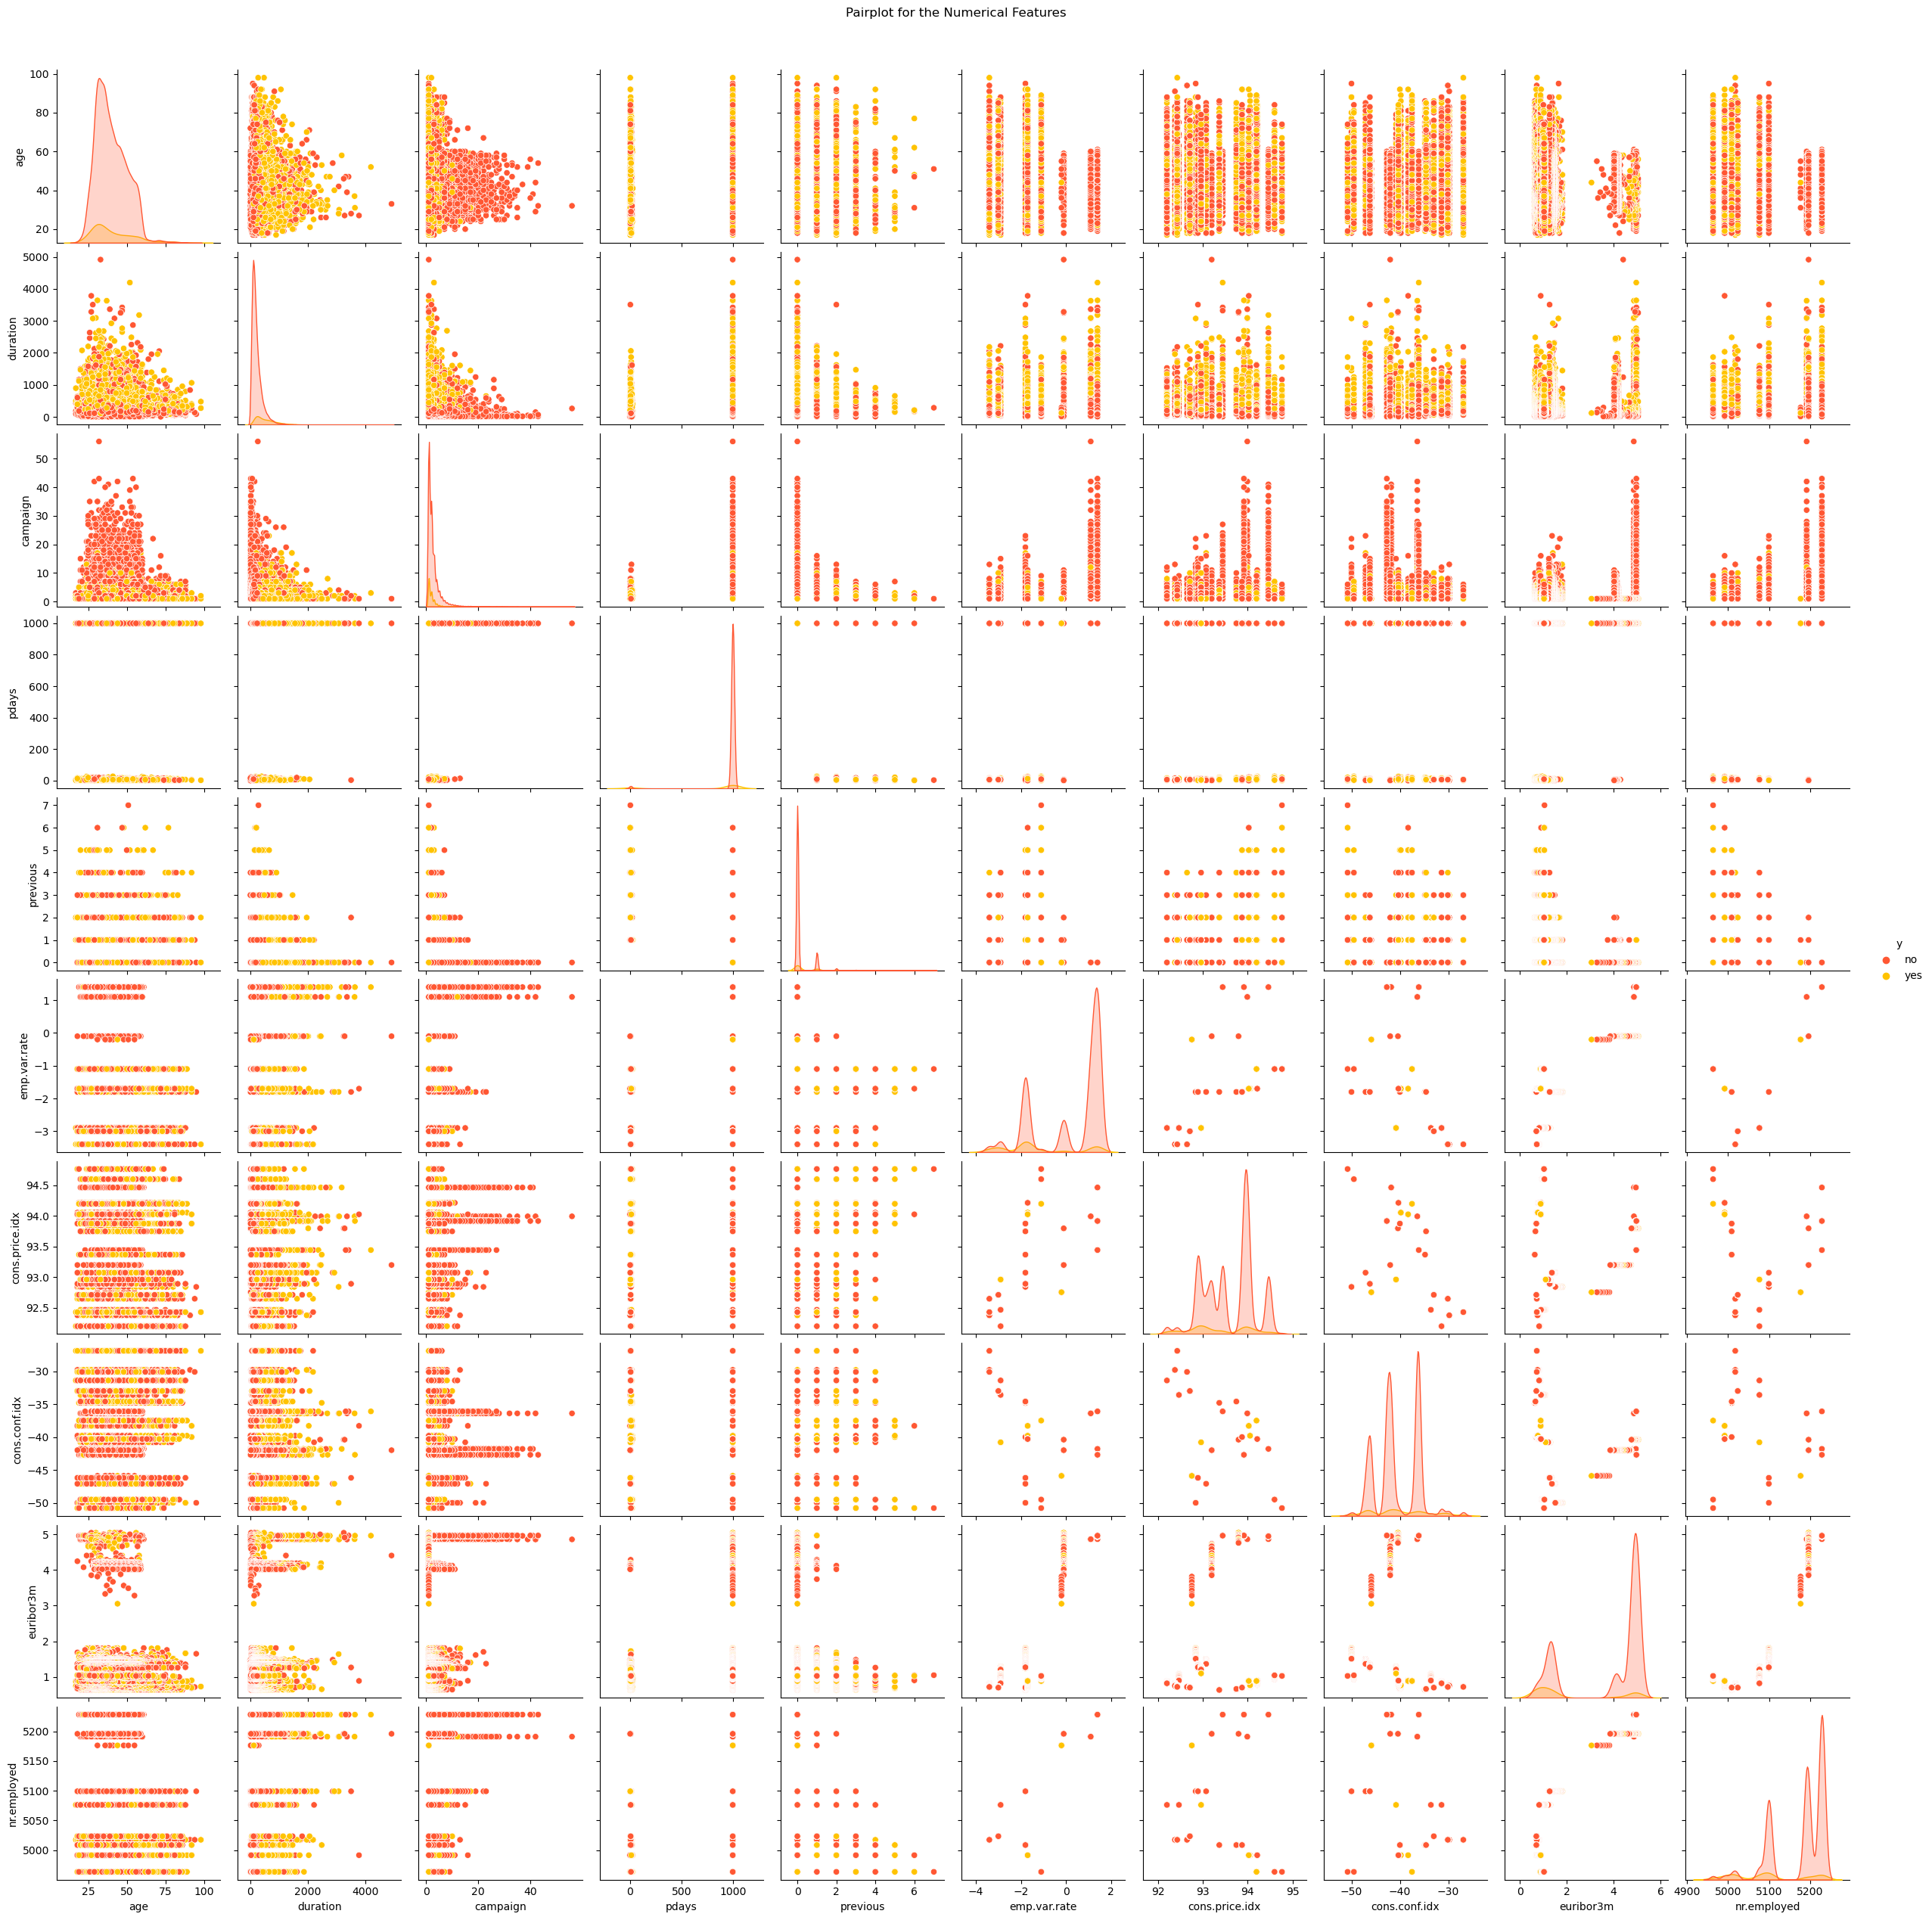

In [23]:
#pairplot
sns.pairplot(data,hue='y')
plt.suptitle('Pairplot for the Numerical Features', y=1.02)
plt.show()

# Data Preprocessing

In [24]:
# Check null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### There Is No Null Values

In [25]:
#check for duplicate
data.duplicated().sum()

12

In [26]:
data.loc[data.duplicated()]

age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1266   telephone   may         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32516   cellular   may         fri  ...         4    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.1          93.994          -36.4      4.855   
12261  nonexistent          1.4          93.918          -42.7      4.966   
14234  nonexistent          1.4          93.918          -42.7      4.962   
16956  nonexistent          1.4          93.918          -42.7      4.962   
18465  nonexistent          1.4          93.918          -42.7      4.968   
20216  nonexistent          1.4          93.444          -36.1      4.965   
20534  nonexistent          1.4          93.444          -36.1      4.966   
25217  nonexistent         -0.1          93.200          -42.0      4.153   
28477  nonexistent         -1.8          93.075          -47.1      1.423   
32516  nonexistent         -1.8          92.893          -46.2      1.313   
36951  nonexistent         -2.9          92.469          -33.6      1.072   
38281  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1266        5191.0   no  
12261       5228.1   no  
14234       5228.1   no  
16956       5228.1   no  
18465       5228.1   no  
20216       5228.1   no  
20534       5228.1   no  
25217       5195.8   no  
28477       5099.1   no  
32516       5099.1   no  
36951       5076.2  yes  
38281       5017.5   no  

[12 rows x 21 columns]

In [27]:
data.drop(data[data.duplicated()].index, inplace=True)

In [28]:
data.duplicated().sum()

0

### Our Insight For Duplicate Data:
#### We have identified 12 duplicated rows out of the 41,188 total rows, and we have removed these duplicated rows from the dataset

# Check for Outliers

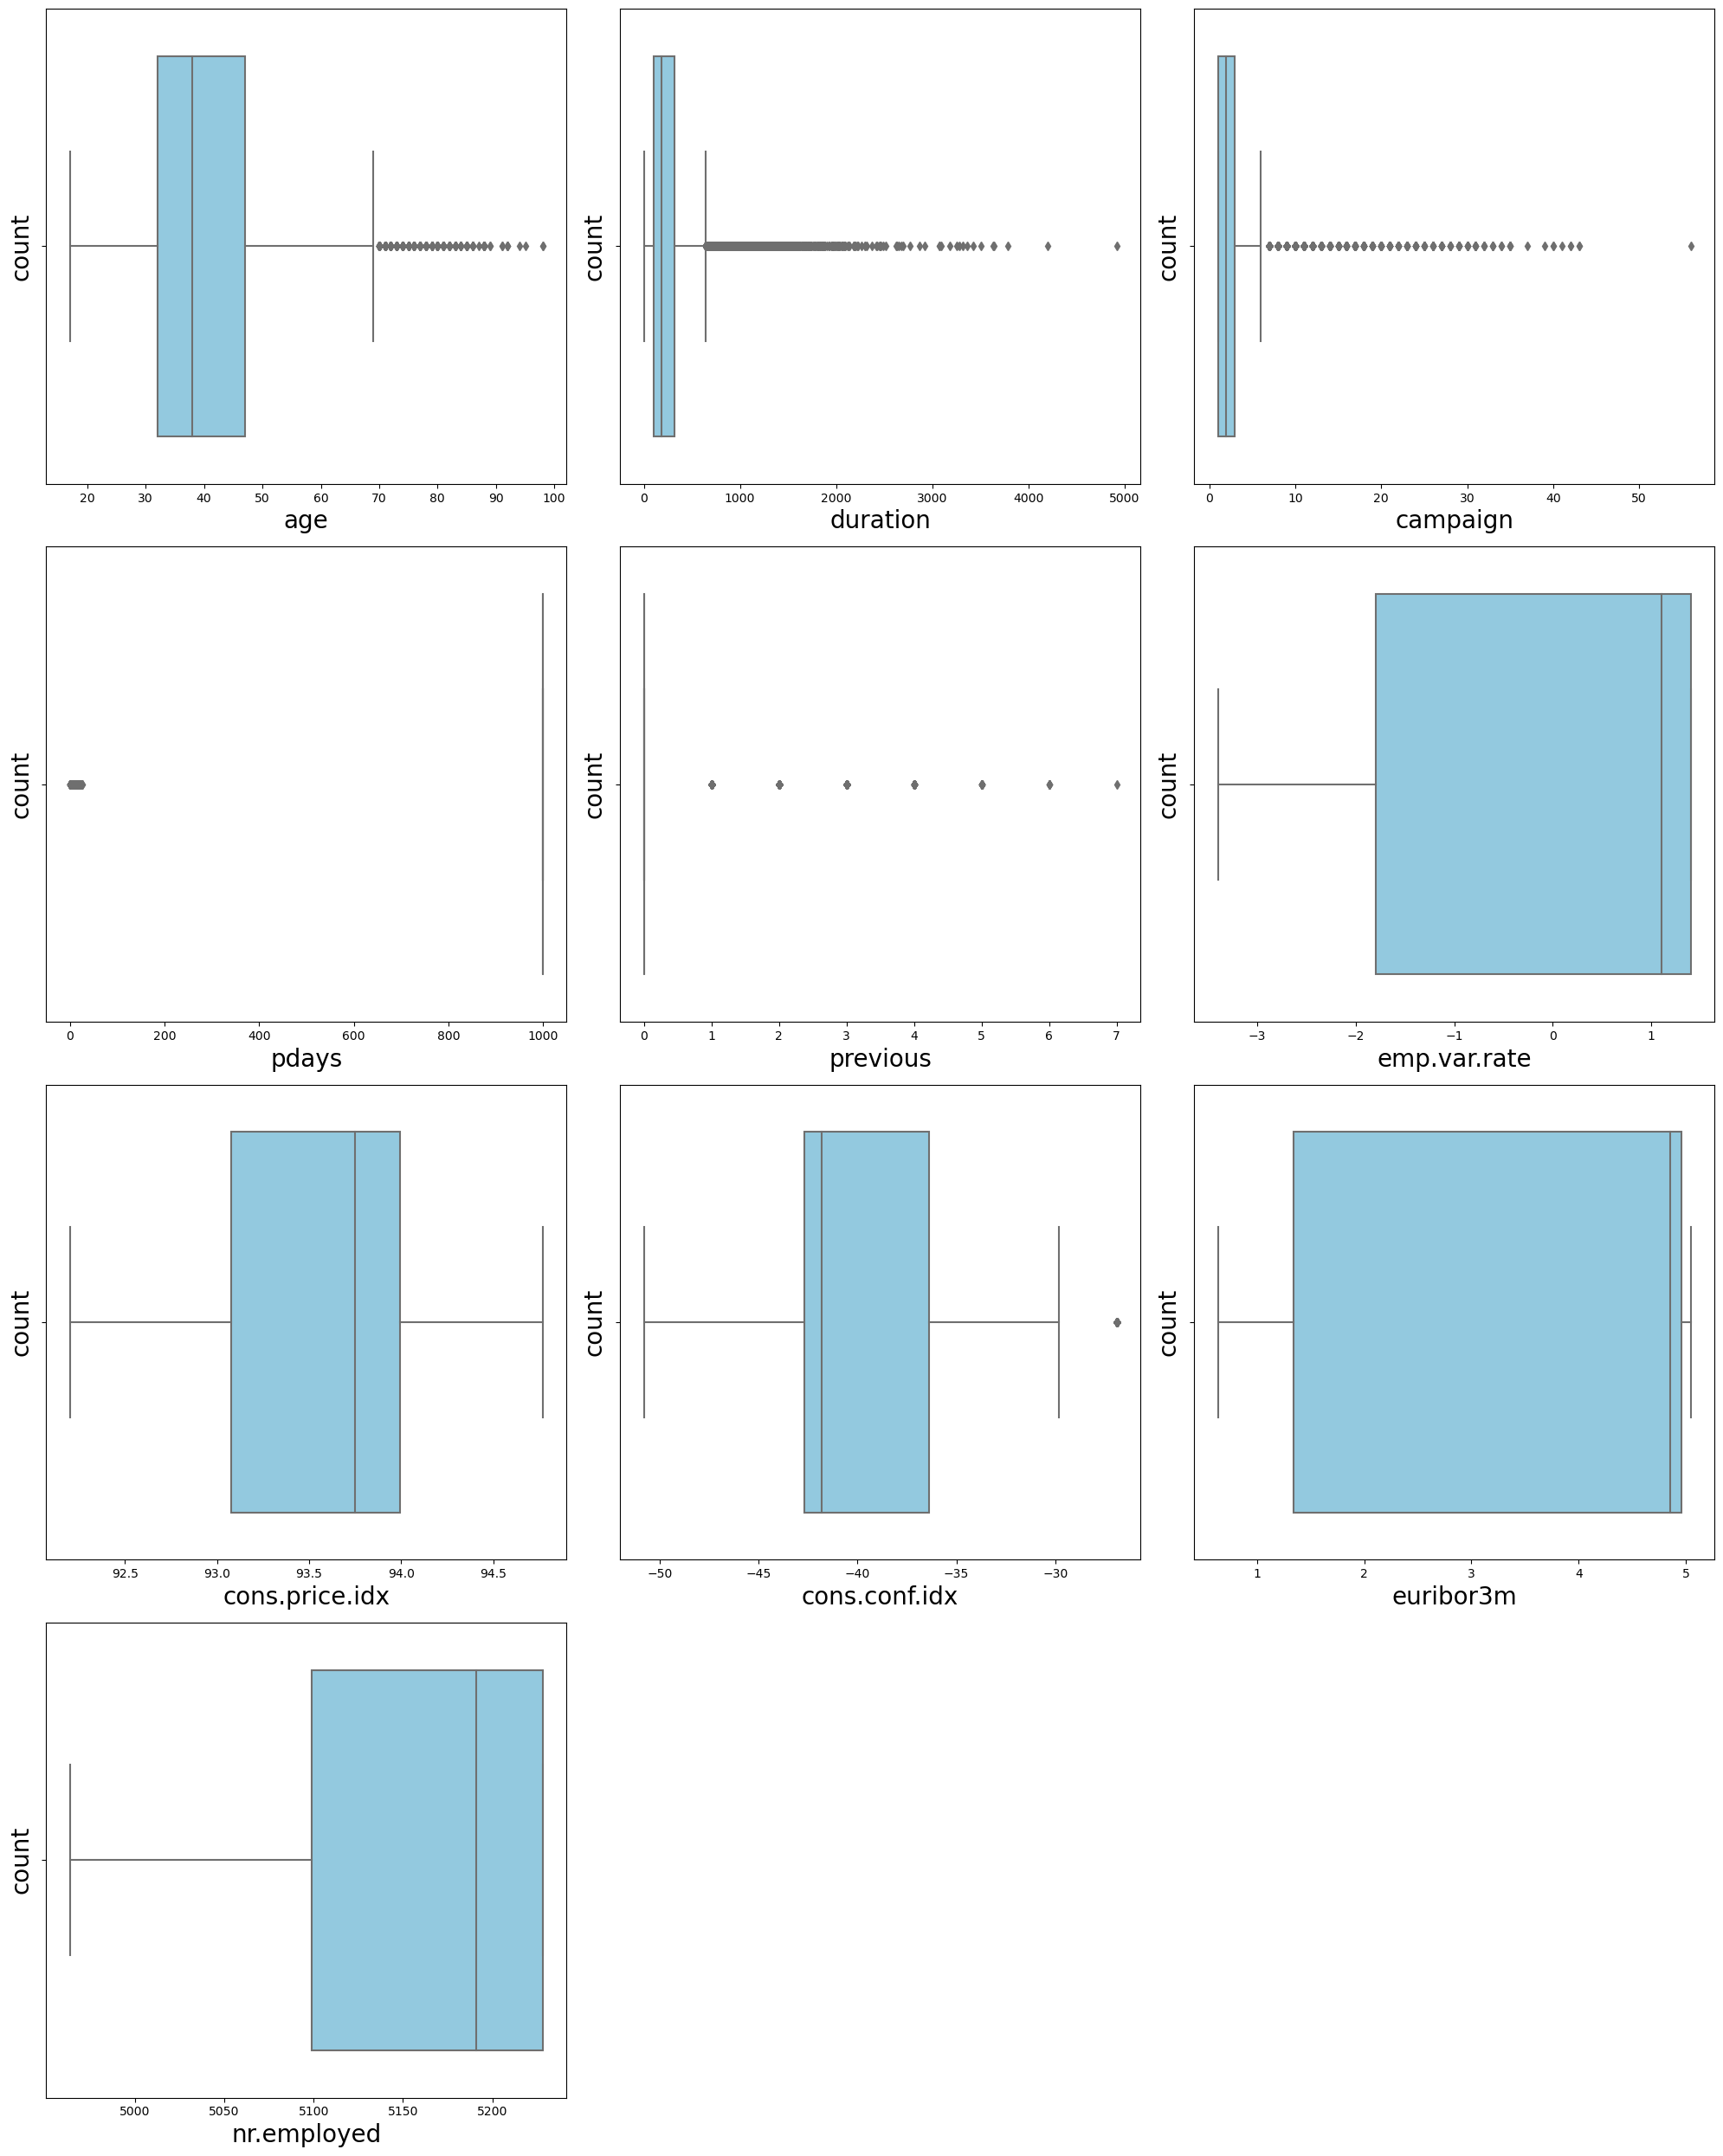

In [29]:
#Boxplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_data:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(x=data[column],color='skyblue')
    plt.xlabel(column,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

### Our Insights:
* Upon evaluating box plots for the numerical columns age,duration,campaign,previous,and cons.conf.idx outliers were identified.

## Age

In [30]:
# Finding Outlier in Age
Q1=data['age'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['age'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : 32.0
upper quantile : 47.0
IQR : 15.0
lower_limit : 9.5
upper_limit : 69.5


In [31]:
# find the values of above upper limit
data.loc[data.age>upper_limit]

age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
27713  cellular   mar         mon  ...         3    999         0   
27757  cellular   mar         thu  ...         9    999         0   
27780  cellular   mar         tue  ...         1    999         1   
27800  cellular   mar         wed  ...         1    999         0   
27802  cellular   mar         wed  ...         2    999         0   
...         ...   ...         ...  ...       ...    ...       ...   
40986  cellular   oct         mon  ...         4      3         1   
40996  cellular   oct         wed  ...         1    999         2   
41004  cellular   oct         thu  ...         1    999         1   
41183  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
27713  nonexistent         -1.8          92.843          -50.0      1.811   
27757  nonexistent         -1.8          92.843          -50.0      1.757   
27780      failure         -1.8          92.843          -50.0      1.687   
27800  nonexistent         -1.8          92.843          -50.0      1.663   
27802  nonexistent         -1.8          92.843          -50.0      1.663   
...            ...          ...             ...            ...        ...   
40986      success         -1.1          94.601          -49.5      1.000   
40996      failure         -1.1          94.601          -49.5      1.016   
41004      failure         -1.1          94.601          -49.5      1.025   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
27713       5099.1  yes  
27757       5099.1   no  
27780       5099.1   no  
27800       5099.1   no  
27802       5099.1  yes  
...            ...  ...  
40986       4963.6   no  
40996       4963.6  yes  
41004       4963.6  yes  
41183       4963.6  yes  
41187       4963.6   no  

[468 rows x 21 columns]

In [32]:
#find the vales below lower limit
data.loc[data.age<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [33]:
# Checking the percentage of outlier
(len(data.loc[data.age>upper_limit])/len(data))

0.011365844181076355

In [34]:
#check age median
data.age.median()

38.0

In [35]:
# replace the outlier with median
data.loc[data['age']>upper_limit,'age']=data['age'].median()

<Axes: xlabel='age'>

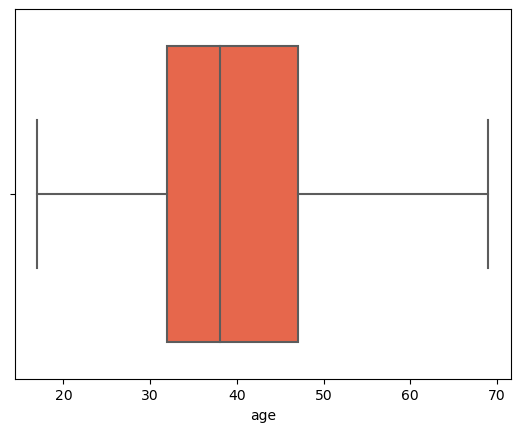

In [36]:
#boxplot
sns.boxplot(x=data.age)

### Our Insights:
#### After Replacing The Age Oulier with Median we Can See That The Age In Box Plot

In [37]:
# Checking the percentage of outlier
len(data.loc[data.age<lower_limit])/len(data)

0.0

## Duration

In [38]:
# Finding Outlier in duration
Q1=data['duration'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['duration'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : 102.0
upper quantile : 319.0
IQR : 217.0
lower_limit : -223.5
upper_limit : 644.5


In [39]:
# find the values of above upper limit
data.loc[data.duration>upper_limit]

age           job   marital            education  default housing loan  \
37      52    technician   married             basic.9y       no     yes   no   
57      45      services   married          high.school  unknown     yes   no   
61      51   blue-collar   married             basic.9y       no     yes   no   
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
...    ...           ...       ...                  ...      ...     ...  ...   
41147   25    technician    single  professional.course       no     yes   no   
41153   67     housemaid  divorced  professional.course       no     yes   no   
41160   33        admin.   married    university.degree       no      no   no   
41164   54        admin.   married  professional.course       no      no   no   
41166   32        admin.   married    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
37     telephone   may         mon  ...         1    999         0   
57     telephone   may         mon  ...         1    999         0   
61     telephone   may         mon  ...         1    999         0   
75     telephone   may         mon  ...         1    999         0   
83     telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41147   cellular   nov         fri  ...         2     19         1   
41153   cellular   nov         mon  ...         2      5         5   
41160   cellular   nov         tue  ...         1    999         0   
41164   cellular   nov         tue  ...         2     10         1   
41166  telephone   nov         wed  ...         1    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
37     nonexistent          1.1          93.994          -36.4      4.857   
57     nonexistent          1.1          93.994          -36.4      4.857   
61     nonexistent          1.1          93.994          -36.4      4.857   
75     nonexistent          1.1          93.994          -36.4      4.857   
83     nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41147      success         -1.1          94.767          -50.8      1.040   
41153      success         -1.1          94.767          -50.8      1.039   
41160  nonexistent         -1.1          94.767          -50.8      1.035   
41164      success         -1.1          94.767          -50.8      1.035   
41166      failure         -1.1          94.767          -50.8      1.030   

       nr.employed    y  
37          5191.0   no  
57          5191.0   no  
61          5191.0   no  
75          5191.0  yes  
83          5191.0  yes  
...            ...  ...  
41147       4963.6  yes  
41153       4963.6  yes  
41160       4963.6  yes  
41164       4963.6  yes  
41166       4963.6  yes  

[2963 rows x 21 columns]

In [40]:
#find the vales below lower limit
data.loc[data.duration<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [41]:
# Checking the percentage of outlier
len(data.loc[data.duration>upper_limit])/len(data)

0.07195939382164368

### Our Insight:
#### In the 'duration' column, we have identified that more than 7% of the data points are outliers. Since these outliers are part of our original data distribution, we have decided not to replace them with the median or any other value.

# campaign

In [42]:
# Finding Outlier in campaign
Q1=data['campaign'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['campaign'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : 1.0
upper quantile : 3.0
IQR : 2.0
lower_limit : -2.0
upper_limit : 6.0


In [43]:
# find the values of above upper limit
data.loc[data.campaign>upper_limit]

age           job   marital            education  default housing loan  \
887     54        admin.   married    university.degree       no      no   no   
1043    41    technician    single    university.degree  unknown      no   no   
1094    40    technician   married  professional.course       no     yes   no   
1097    51   blue-collar   married             basic.4y  unknown     yes   no   
1230    48   blue-collar  divorced             basic.4y       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
40611   38       retired   married             basic.9y       no      no   no   
40631   38       retired   married             basic.4y       no     yes   no   
40698   29    technician    single  professional.course       no     yes   no   
40821   33    technician    single  professional.course       no     yes   no   
40993   50  entrepreneur  divorced    university.degree       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
887    telephone   may         wed  ...         7    999         0   
1043   telephone   may         wed  ...         8    999         0   
1094   telephone   may         wed  ...         8    999         0   
1097   telephone   may         wed  ...         7    999         0   
1230   telephone   may         thu  ...         7    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
40611  telephone   sep         fri  ...         9    999         1   
40631   cellular   sep         mon  ...         7    999         0   
40698   cellular   sep         mon  ...         7      3         5   
40821   cellular   sep         fri  ...         9    999         2   
40993  telephone   oct         tue  ...         7     11         2   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
887    nonexistent          1.1          93.994          -36.4      4.856   
1043   nonexistent          1.1          93.994          -36.4      4.856   
1094   nonexistent          1.1          93.994          -36.4      4.856   
1097   nonexistent          1.1          93.994          -36.4      4.856   
1230   nonexistent          1.1          93.994          -36.4      4.855   
...            ...          ...             ...            ...        ...   
40611      failure         -1.1          94.199          -37.5      0.883   
40631  nonexistent         -1.1          94.199          -37.5      0.882   
40698      success         -1.1          94.199          -37.5      0.879   
40821      failure         -1.1          94.199          -37.5      0.879   
40993      success         -1.1          94.601          -49.5      1.008   

       nr.employed    y  
887         5191.0   no  
1043        5191.0   no  
1094        5191.0   no  
1097        5191.0   no  
1230        5191.0   no  
...            ...  ...  
40611       4963.6   no  
40631       4963.6   no  
40698       4963.6   no  
40821       4963.6   no  
40993       4963.6  yes  

[2406 rows x 21 columns]

In [44]:
#find the vales below lower limit
data.loc[data.campaign<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [45]:
# Checking the percentage of outlier
(len(data.loc[data.campaign>upper_limit])/len(data))

0.05843209636681562

### Our Insights:
#### In the 'campaign' column, we have identified that more than 5.8% of the data points are outliers. 
#### Since these outliers are part of our original data distribution, we have decided not to replace them with the median or any other value.

# previous

In [46]:
# Finding Outlier in previous
Q1=data['previous'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['previous'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : 0.0
upper quantile : 0.0
IQR : 0.0
lower_limit : 0.0
upper_limit : 0.0


In [47]:
# find the values of above upper limit
data.loc[data.previous>upper_limit]

age          job  marital            education default housing loan  \
24013   38  blue-collar   single              unknown      no     yes   no   
24019   40     services  married          high.school      no     yes   no   
24076   36       admin.  married    university.degree      no     yes   no   
24102   36       admin.  married          high.school      no     yes   no   
24108   37       admin.  married    university.degree      no     yes   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41174   62      retired  married    university.degree      no     yes   no   
41175   34      student   single              unknown      no     yes   no   
41178   62      retired  married    university.degree      no      no   no   
41182   29   unemployed   single             basic.4y      no     yes   no   
41187   38      retired  married  professional.course      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  poutcome  \
24013  telephone   oct         tue  ...         1    999         1   failure   
24019  telephone   oct         tue  ...         1    999         1   failure   
24076  telephone   nov         wed  ...         1    999         1   failure   
24102  telephone   nov         wed  ...         1    999         1   failure   
24108  telephone   nov         wed  ...         1      6         1   success   
...          ...   ...         ...  ...       ...    ...       ...       ...   
41174   cellular   nov         thu  ...         1      1         6   success   
41175   cellular   nov         thu  ...         1    999         2   failure   
41178   cellular   nov         thu  ...         2      6         3   success   
41182   cellular   nov         fri  ...         1      9         1   success   
41187   cellular   nov         fri  ...         3    999         1   failure   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
24013         -0.1          93.798          -40.4      4.968       5195.8   no  
24019         -0.1          93.798          -40.4      4.968       5195.8  yes  
24076         -0.1          93.200          -42.0      4.663       5195.8   no  
24102         -0.1          93.200          -42.0      4.286       5195.8  yes  
24108         -0.1          93.200          -42.0      4.286       5195.8   no  
...            ...             ...            ...        ...          ...  ...  
41174         -1.1          94.767          -50.8      1.031       4963.6  yes  
41175         -1.1          94.767          -50.8      1.031       4963.6   no  
41178         -1.1          94.767          -50.8      1.031       4963.6  yes  
41182         -1.1          94.767          -50.8      1.028       4963.6   no  
41187         -1.1          94.767          -50.8      1.028       4963.6   no  

[5625 rows x 21 columns]

In [48]:
#find the vales below lower limit
data.loc[data.previous<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [49]:
# Checking the percentage of outlier
len(data.loc[data.previous>upper_limit])/len(data)

0.13660870409947543

### Our Insights:
#### In the 'previous' column, we have identified that more than 13% of the data points are outliers. 
#### Since these outliers are part of our original data distribution, we have decided not to replace them with the median or any other value.

# cons.conf.idx

In [50]:
# Finding Outlier in cons.conf.idx
Q1=data['cons.conf.idx'].quantile(0.25)
print('lower quantile :',Q1)
Q3=data['cons.conf.idx'].quantile(0.75)
print('upper quantile :',Q3)
# finding IQR
IQR=Q3-Q1
print('IQR :',IQR)
#finding lower and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit :',upper_limit)

lower quantile : -42.7
upper quantile : -36.4
IQR : 6.300000000000004
lower_limit : -52.150000000000006
upper_limit : -26.949999999999992


In [51]:
# find the values of above upper limit
data.loc[data['cons.conf.idx']>upper_limit]

age         job   marital          education default housing loan  \
38154   50  management   married  university.degree      no     yes   no   
38155   37      admin.    single  university.degree      no     yes   no   
38156   59  technician    single           basic.6y      no      no   no   
38157   31      admin.   married  university.degree      no     yes   no   
38158   35      admin.   married        high.school      no     yes   no   
...    ...         ...       ...                ...     ...     ...  ...   
38596   69     retired   married           basic.4y      no     yes  yes   
38597   18     student    single           basic.6y      no      no  yes   
38598   59     retired  divorced           basic.4y      no     yes   no   
38599   37      admin.    single  university.degree      no      no   no   
38600   38     retired  divorced           basic.6y      no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
38154   cellular   oct         thu  ...         2      4         1   
38155   cellular   oct         thu  ...         3    999         0   
38156   cellular   oct         thu  ...         1    999         2   
38157   cellular   oct         thu  ...         1    999         0   
38158   cellular   oct         thu  ...         1      4         1   
...          ...   ...         ...  ...       ...    ...       ...   
38596   cellular   oct         fri  ...         3    999         0   
38597   cellular   oct         fri  ...         2    999         0   
38598  telephone   oct         fri  ...         4    999         0   
38599   cellular   oct         fri  ...         2    999         0   
38600  telephone   oct         fri  ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
38154      success         -3.4          92.431          -26.9      0.754   
38155  nonexistent         -3.4          92.431          -26.9      0.754   
38156      failure         -3.4          92.431          -26.9      0.754   
38157  nonexistent         -3.4          92.431          -26.9      0.754   
38158      success         -3.4          92.431          -26.9      0.754   
...            ...          ...             ...            ...        ...   
38596  nonexistent         -3.4          92.431          -26.9      0.720   
38597  nonexistent         -3.4          92.431          -26.9      0.720   
38598  nonexistent         -3.4          92.431          -26.9      0.720   
38599  nonexistent         -3.4          92.431          -26.9      0.720   
38600  nonexistent         -3.4          92.431          -26.9      0.720   

       nr.employed    y  
38154       5017.5  yes  
38155       5017.5  yes  
38156       5017.5   no  
38157       5017.5   no  
38158       5017.5  yes  
...            ...  ...  
38596       5017.5  yes  
38597       5017.5  yes  
38598       5017.5   no  
38599       5017.5  yes  
38600       5017.5   no  

[446 rows x 21 columns]

In [52]:
#find the vales below lower limit
data.loc[data['cons.conf.idx']<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [53]:
# Checking the percentage of outlier
len(data.loc[data['cons.conf.idx']>upper_limit])/len(data)

0.010831552360598407

In [54]:
# check Cons.conf.idx
data['cons.conf.idx'].median()

-41.8

In [55]:
# replace the outlier with median
data.loc[data['cons.conf.idx']>upper_limit,'cons.conf.idx']=data['cons.conf.idx'].median()

<Axes: xlabel='cons.conf.idx'>

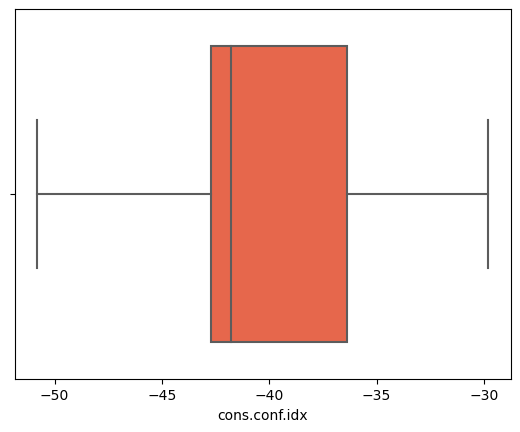

In [56]:
# Boxplot
sns.boxplot(x=data['cons.conf.idx'])

In [57]:
#Checking the percentage of outlier
len(data.loc[data['cons.conf.idx']>upper_limit])/len(data)

0.0

# Extract Categorical data into Numerical Data

In [58]:
#fetching the Categorical columns
cat_data1=data.select_dtypes(include='object')
cat_data1

job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome    y  
0      telephone   may         mon  nonexistent   no  
1      telephone   may         mon  nonexistent   no  
2      telephone   may         mon  nonexistent   no  
3      telephone   may         mon  nonexistent   no  
4      telephone   may         mon  nonexistent   no  
...          ...   ...         ...          ...  ...  
41183   cellular   nov         fri  nonexistent  yes  
41184   cellular   nov         fri  nonexistent   no  
41185   cellular   nov         fri  nonexistent   no  
41186   cellular   nov         fri  nonexistent  yes  
41187   cellular   nov         fri      failure   no  

[41176 rows x 11 columns]

In [59]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for column in cat_data1:
    data[column]=label.fit_transform(cat_data1[column])

In [60]:
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [61]:
data1=data.copy()

In [62]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data1[['duration','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=scale.fit_transform(data1[['duration','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])
data1

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   38    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         1    999         0         1           1.1   
1                1  ...         1    999         0         1           1.1   
2                1  ...         1    999         0         1           1.1   
3                1  ...         1    999         0         1           1.1   
4                1  ...         1    999         0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            0  ...         1    999         0         1          -1.1   
41184            0  ...         1    999         0         1          -1.1   
41185            0  ...         2    999         0         1          -1.1   
41186            0  ...         1    999         0         1          -1.1   
41187            0  ...         3    999         1         0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0            0.722628       0.968037   0.712463     0.331695  0  
1            0.722628       0.968037   0.712463     0.331695  0  
2            0.722628       0.968037   0.712463     0.331695  0  
3            0.722628       0.968037   0.712463     0.331695  0  
4            0.722628       0.968037   0.712463     0.331695  0  
...               ...            ...        ...          ... ..  
41183        2.058076      -2.300936  -1.495197    -2.815689  1  
41184        2.058076      -2.300936  -1.495197    -2.815689  0  
41185        2.058076      -2.300936  -1.495197    -2.815689  0  
41186        2.058076      -2.300936  -1.495197    -2.815689  1  
41187        2.058076      -2.300936  -1.495197    -2.815689  0  

[41176 rows x 21 columns]

* we see the  variations from the columns('duration','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'). 
* so we can handle those columns.
* we use Standar Scaler

# Feature Engineering

In [63]:
# Check for correlation
# Correlation Only for Continous Data so We extract the continous data for correlation  and also drop the target
num_data.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

<Axes: >

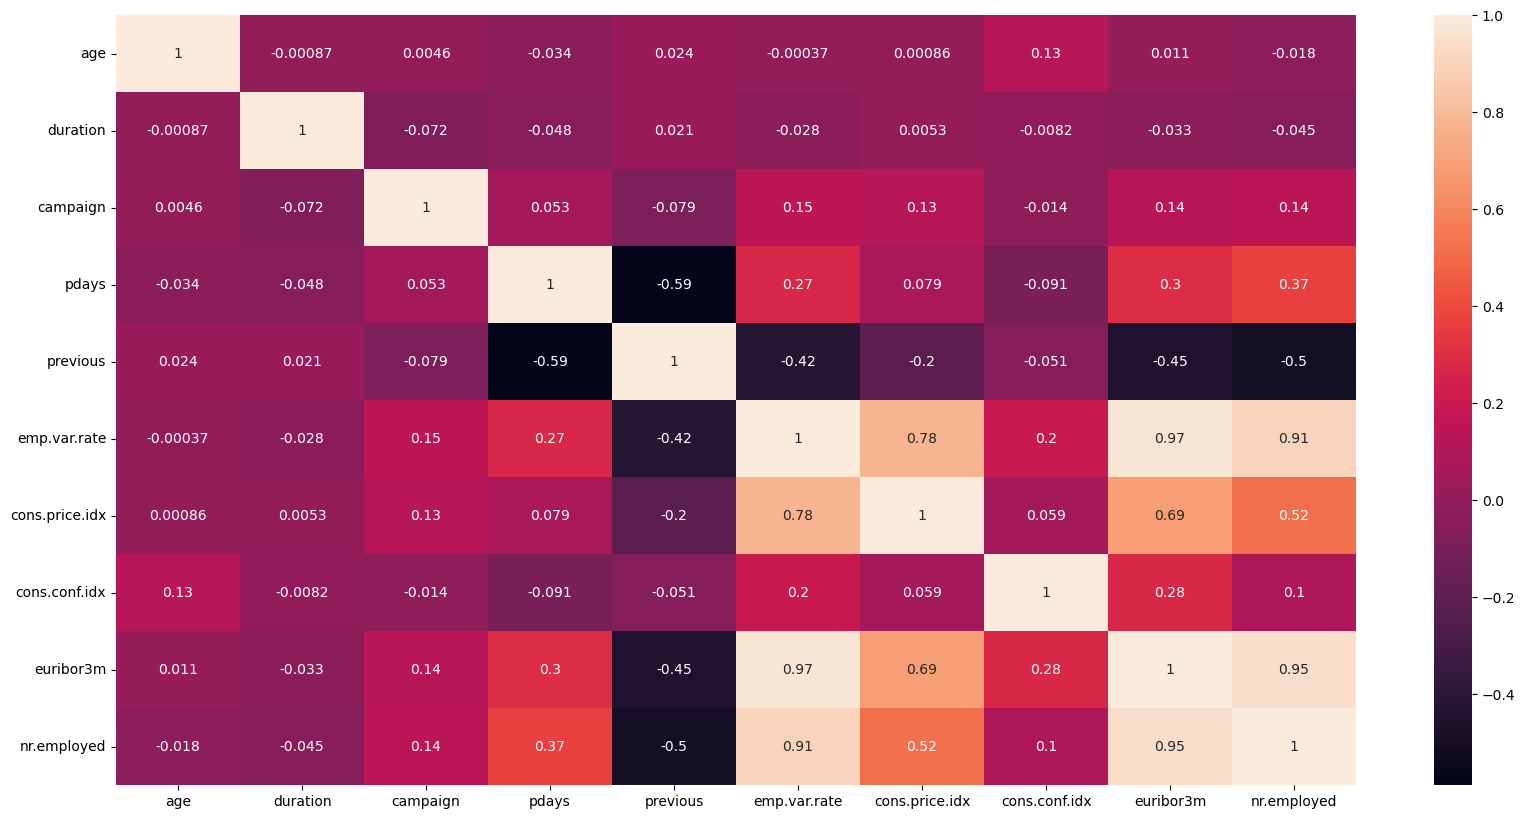

In [64]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(num_data.corr(),annot=True)

### Our Insights:
* Column emp.var.rate correlated to euribor3m and nr.employed
* euribor3m and nr.employed correlated each others
* we have to drop the correalted columns

In [65]:
data1.drop('euribor3m',axis=1,inplace=True)

In [66]:
data1.drop('nr.employed',axis=1,inplace=True)

# Data Analysis Report
## Columns Details:
* Job: 12 unique categories, 'admin.' is the most frequent (10,422 times).
* Marital: 4 unique categories, 'married' is the most frequent (24,928 times).
* Education: 8 unique categories, 'university.degree' is the most frequent (12,168 times).
* Default: 3 unique categories, 'no' is the most frequent (32,588 times).
* Housing: 3 unique categories, 'yes' is the most frequent (21,576 times).
* Loan: 3 unique categories, 'no' is the most frequent (33,950 times).
* Contact: 2 unique categories, 'cellular' is the most frequent (26,144 times).
* Month: 10 unique categories, 'may' is the most frequent (13,769 times).
* Day of Week: 5 unique categories, 'thu' is the most frequent (8,623 times).
* Poutcome: 3 unique categories, 'nonexistent' is the most frequent (35,563 times).
* Age: Mean age is approximately 40 years, with a range from 17 to 98.
* Duration: The average call duration is around 258 seconds, with some calls lasting up to 4,918 seconds.
* Campaign: On average, customers were contacted about 2.57 times during the campaign, but there were 
  outliers with up to 56 contacts.
* Pdays: Most customers were not previously contacted (999), but there is variation, with a mean of 962.48.
* Previous: On average, customers had a previous contact count of 0.17, but some had up to 7 previous contacts.
* Emp.Var.Rate: The employment variation rate is mostly around 0.08, with some variation between -3.4 and 1.4.
* Cons.Price.Idx: The consumer price index averages at 93.58, with values ranging from 92.201 to 94.767.
* Cons.Conf.Idx: The consumer confidence index has a mean of -40.50, varying from -50.8 to -26.9.
* Euribor3M: The average 3-month Euribor rate is approximately 3.62, but it ranges from 0.634 to 5.045.
* Nr.Employed: The number of employees in thousands has a mean of 5,167.04, with values ranging from 4,963.6 to 5,228.1.

## Summary:
* The features 'age,' 'duration,' 'campaign,' 'pdays,' 'previous,' 'emp.var.rate,' 'cons.price.idx,'
   'cons.conf.idx,' 'euribor3m,' and 'nr.employed' are all continuous numerical variables.
 * These numerical variables do not follow a simple normal distribution pattern and may have irregularities, 
   peaks, or valleys in their distributions.
 * The feature 'pdays' distribution is heavily right-skewed, with the mode at 999 (occurring 39,673 times) and a 
   long tail of infrequently occurring values, including some outliers.
 * The  feature 'previous' represents a highly imbalanced distribution, with the majority of values (0) occurring 
   35,563 times, while other values (1, 2, 3, 4, 5, 6, 7) are relatively rare, suggesting a class imbalance issue.
 * Column emp.var.rate correlated to euribor3m and nr.employed.
 * euribor3m and nr.employed correlated each others.so we dropped these columns

# Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

# Split the data Into Train and Test

In [67]:
x=data1.drop('y',axis=1)

In [68]:
x.shape

(41176, 18)

In [69]:
y=data1['y']

In [70]:
y.shape

(41176,)

In [71]:
# split the data into x_train,y_train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [72]:
# check the balance of target value for better prediction
data.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

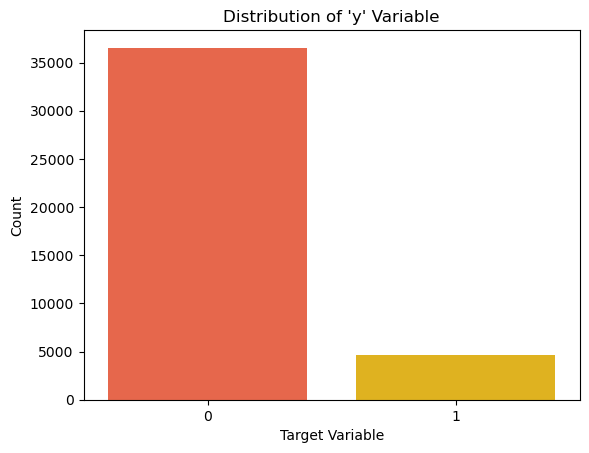

In [73]:
#Bar plot
sns.barplot(x=data['y'].value_counts().index, y=data['y'].value_counts())
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.title("Distribution of 'y' Variable")
plt.show()

### Our Insights:
 * Target variable  is  imbalance so we can use smote to balance the data

In [74]:
# import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [75]:
y_smote.value_counts()

0    25608
1    25608
Name: y, dtype: int64

In [76]:
#import Libraries
from collections import Counter
print("Actual value :",Counter(y_train))
print("Smote value :",Counter(y_smote))

Actual value : Counter({0: 25608, 1: 3215})
Smote value : Counter({0: 25608, 1: 25608})


# Model Creation
## Logistic Regression

In [77]:
# import libraries
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_smote,y_smote)

LogisticRegression()

In [78]:
y_pred=log.predict(x_test)

# Model Evaluation

In [79]:
#import Libraries
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

In [80]:
#Accuracy score
lr=accuracy_score(y_test,y_pred)
print(lr)

0.8525864162551607


In [81]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10929
           1       0.43      0.85      0.57      1424

    accuracy                           0.85     12353
   macro avg       0.70      0.85      0.74     12353
weighted avg       0.91      0.85      0.87     12353



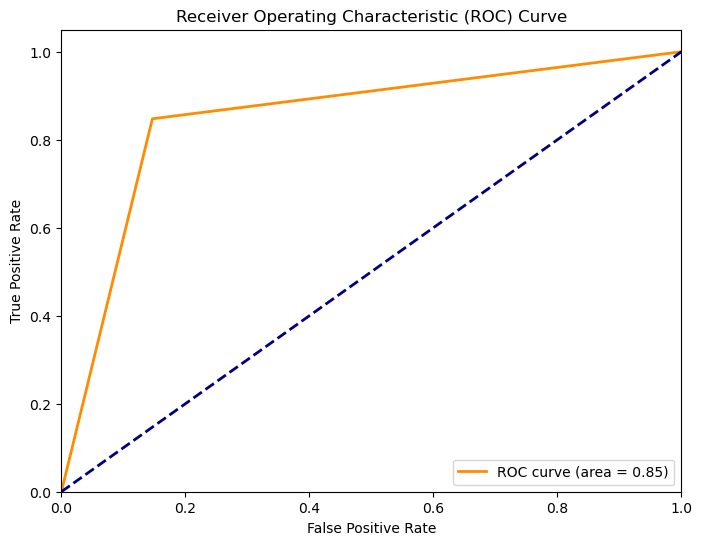

In [82]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insight:
 * Our Logistic model,accuracy score of 85% and an ROC AUC of 0.85 are indicative of a well-performing 
   logistic regression model.

# KNN Classifier

In [83]:
# Import Libraries 
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_smote, y_smote)

KNeighborsClassifier()

In [84]:
y_pred1=knc.predict(x_test)

# Model Evaluation

In [85]:
# Accuracy score
knn=accuracy_score(y_test,y_pred1)
print(knn)

0.8441674087266251


In [86]:
# Classification Report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     10929
           1       0.40      0.71      0.51      1424

    accuracy                           0.84     12353
   macro avg       0.68      0.79      0.71     12353
weighted avg       0.89      0.84      0.86     12353



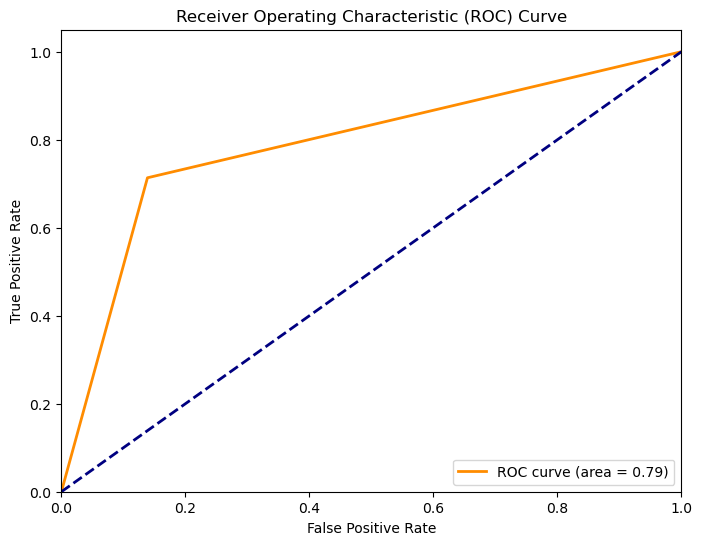

In [87]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred1)
roc_auc = roc_auc_score(y_test,y_pred1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insight:
* our KNN model achieves a solid ROC AUC score of 0.79, indicating effective class separation, 
  along with a respectable accuracy score of 84%.

# SVM Classifier

In [88]:
#import Libraries
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_smote,y_smote)

SVC()

# Model Evaluation

In [89]:
y_pred2=svc.predict(x_test)

In [90]:
# Accuracy score
svm=accuracy_score(y_test,y_pred2)
print(svm)

0.8960576378207723


In [91]:
# Classification Report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10929
           1       0.65      0.21      0.32      1424

    accuracy                           0.90     12353
   macro avg       0.78      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



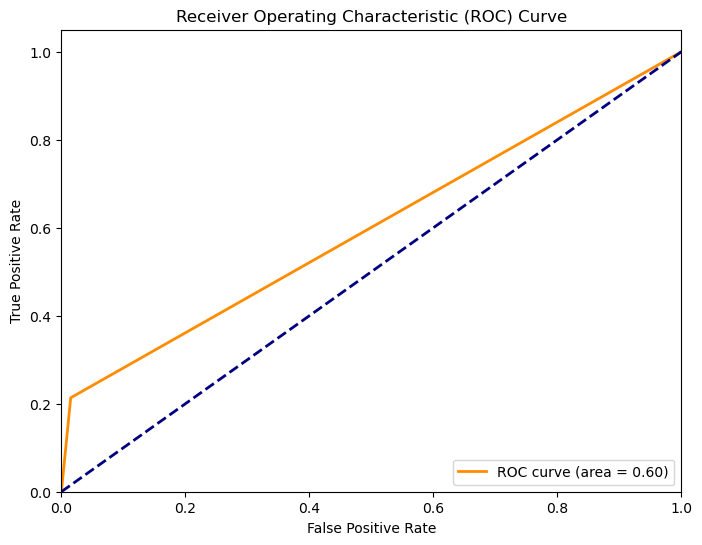

In [92]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred2)
roc_auc = roc_auc_score(y_test,y_pred2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insights:
* The SVM model achieves an 89% accuracy, indicating strong overall classification performance.

* However, the ROC AUC score of 0.60 suggests room for improvement in its ability to distinguish 
  between positive and negative classes.

# Random Forest Classifier

In [93]:
#import Libraries
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_smote,y_smote)

RandomForestClassifier()

In [94]:
y_pred5=rfc.predict(x_test)

## Model Evaluation

In [95]:
# Accuracy score
rfc=accuracy_score(y_test,y_pred5)
print(rfc)

0.8978385817210395


In [96]:
# Classification Report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10929
           1       0.54      0.71      0.61      1424

    accuracy                           0.90     12353
   macro avg       0.75      0.81      0.78     12353
weighted avg       0.91      0.90      0.90     12353



## Hyper Parameter Tunning for RandomForest

In [97]:
# Import Libraries
# Dictionary for parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [98]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
r1_clf1=RandomForestClassifier(random_state=42)
rf_cv=RandomizedSearchCV(estimator=r1_clf1,scoring='accuracy',param_distributions=random_grid,n_iter=100,cv=3,verbose=1,random_state=42,n_jobs=-1)
rf_cv.fit(x_smote,y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [99]:
rf_best_params=rf_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 46, 'bootstrap': False}


In [100]:
rf_clf2=RandomForestClassifier(n_estimators=1400,max_features='auto',max_depth=37,min_samples_split=2,min_samples_leaf=1,random_state=42)
rf_clf2.fit(x_smote,y_smote)
y_pred65=rf_clf2.predict(x_test)

# Model Evaluation

In [101]:
# Accuracy score
rfc1=accuracy_score(y_test,y_pred65)
print(rfc1)

0.8962195418117057


In [102]:
# Classification Report
print(classification_report(y_test,y_pred65))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10929
           1       0.54      0.70      0.61      1424

    accuracy                           0.90     12353
   macro avg       0.75      0.81      0.77     12353
weighted avg       0.91      0.90      0.90     12353



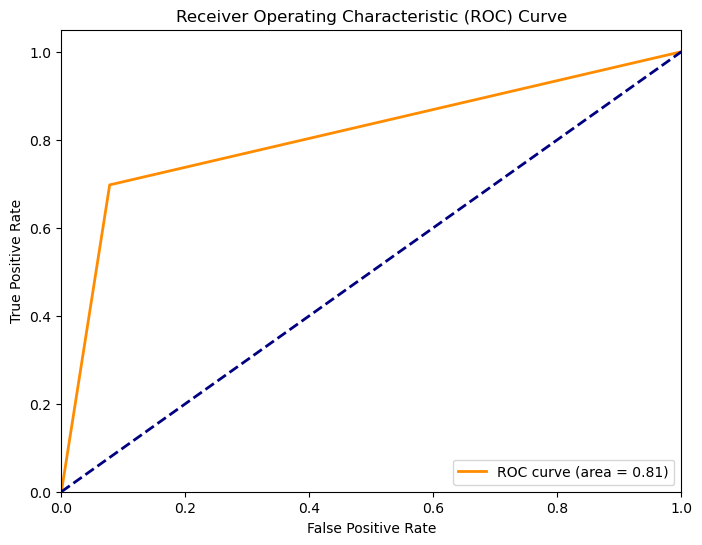

In [103]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred65)
roc_auc = roc_auc_score(y_test,y_pred65)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insights:
For a Random Forest model with an accuracy score of 89% and an ROC AUC score of 0.81:

  * The Random Forest model achieves a commendable accuracy of 89%, indicating effective overall classification performance.

  * The ROC AUC score of 0.81 reflects strong discriminatory power, showcasing the model's ability to distinguish between positive and negative classes.

# Bagging Classifier

In [104]:
#import Libraries
from sklearn.ensemble import BaggingClassifier
#using KNN Classifier as base estimators
bag=BaggingClassifier(base_estimator=knc,n_estimators=100)
bag.fit(x_smote,y_smote)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100)

In [105]:
y_pred6=bag.predict(x_test)

# Model Evaluation

In [106]:
# Accuracy score
bgc=accuracy_score(y_test,y_pred6)
print(bgc)

0.844734072694892


In [107]:
# classification report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     10929
           1       0.40      0.72      0.52      1424

    accuracy                           0.84     12353
   macro avg       0.68      0.79      0.71     12353
weighted avg       0.90      0.84      0.86     12353



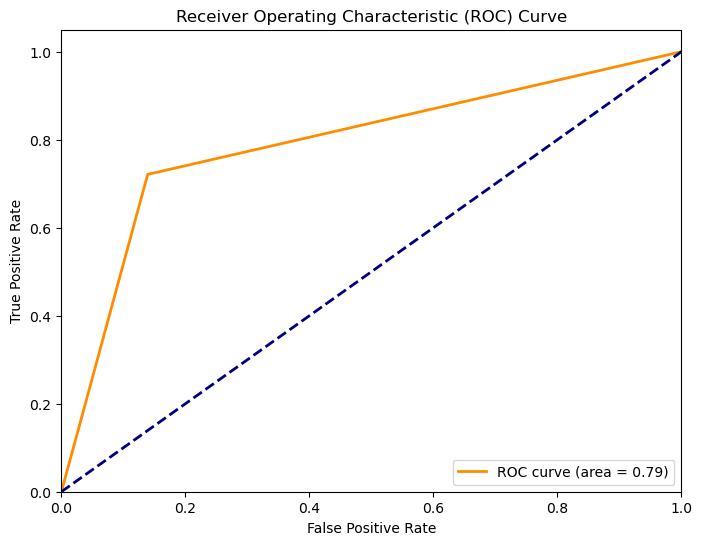

In [108]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred6)
roc_auc = roc_auc_score(y_test,y_pred6)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insights:
For a Bagging model with an accuracy score of 84% and an ROC AUC score of 0.79:

  * The Bagging model achieves a respectable accuracy of 84%, indicating solid overall classification performance.

  * Additionally, the ROC AUC score of 0.79 reflects good discriminatory power, suggesting the model's 
    ability to distinguish between positive and negative classes.

# Gradient Boosting

In [109]:
#import Libraries
from sklearn.ensemble import GradientBoostingClassifier
gdb=GradientBoostingClassifier(n_estimators=100)
gdb.fit(x_smote,y_smote)

GradientBoostingClassifier()

In [110]:
y_pred7=gdb.predict(x_test)

# Model Evaluation

In [111]:
# Accuracy score
gd=accuracy_score(y_test,y_pred)
print(gd)

0.8525864162551607


In [112]:
#classification Report
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92     10929
           1       0.47      0.83      0.60      1424

    accuracy                           0.87     12353
   macro avg       0.72      0.86      0.76     12353
weighted avg       0.92      0.87      0.89     12353



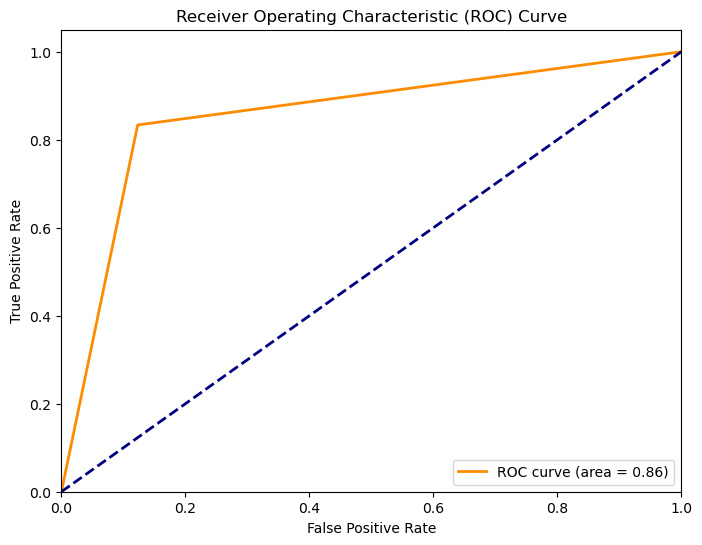

In [113]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred7)
roc_auc = roc_auc_score(y_test,y_pred7)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insights:
For a Gradient Boosting model with an accuracy score of 89% and an ROC AUC score of 0.85:

  * The Gradient Boosting model demonstrates a robust accuracy of 89%, indicating effective 
    overall classification performance.

  * Additionally, the ROC AUC score of 0.85 reflects strong discriminatory power, highlighting the model's 
    ability to distinguish between positive and negative classes with a high degree of accuracy.

# XGBoosting Classifier

In [114]:
# import libraries
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
y_pred8=xg.predict(x_test)

# Model Evaluation

In [116]:
# Accuracy score
xb=accuracy_score(y_test,y_pred8)
print(xb)

0.9126527968914434


In [117]:
#classification report
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10929
           1       0.65      0.52      0.58      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.77     12353
weighted avg       0.91      0.91      0.91     12353



# HyperParameter Tunning for XGBoosting

In [118]:
#import Libraries
from sklearn.model_selection import RandomizedSearchCV
param_grid={'gamma':[0,0.01,0.2,0.3,0.4,2.3,3.7,6.8,10.3,24.6,200,101.5,51.8],
            'learning_rate':[0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
            'max_depth':[5,6,7,8,9,10,11,12,13,14,15],
            'reg_alpha':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
            'reg_lambda':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
            'n_estimators':[50,65,80,100,115,130,150]}
xgb=XGBClassifier(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,verbose=2,n_iter=100,n_jobs=-1,cv=3,scoring='accuracy')
xgb_cv.fit(x_train,y_train)
best_param=xgb_cv.best_params_
print('best_params',best_param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best_params {'reg_lambda': 1.6, 'reg_alpha': 0.2, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 6.8}


In [119]:
xg=XGBClassifier(reg_lambda=12.8,reg_alpha=25.6,n_estimators=100,max_depth=14,learning_rate=0.300000012,gamma=0.4)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
y_pred9=xg.predict(x_test)

# Model Evaluation

In [121]:
#Accuracy score
xgb1=accuracy_score(y_test,y_pred9)
print(xgb1)

0.9126527968914434


In [122]:
#classification report
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10929
           1       0.66      0.49      0.56      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.73      0.76     12353
weighted avg       0.90      0.91      0.91     12353



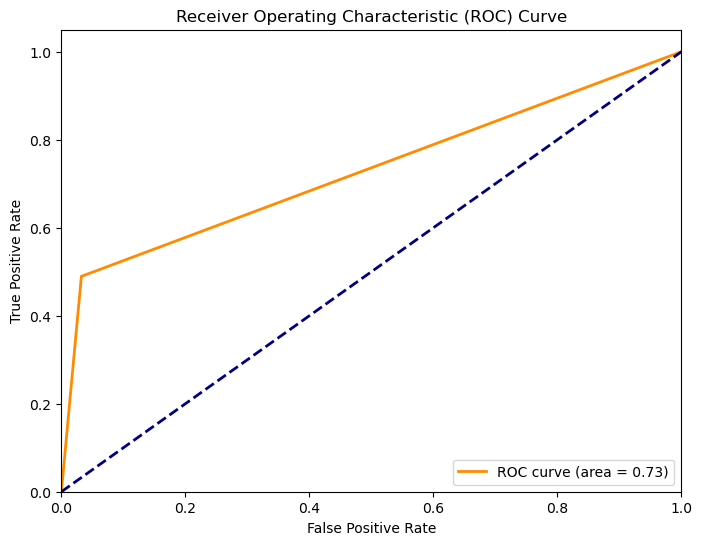

In [123]:
#ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred9)
roc_auc = roc_auc_score(y_test,y_pred9)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Our Insights:
For an XGBoost (Extreme Gradient Boosting) model with an accuracy score of 91% and an ROC AUC score of 0.75:

  * The XGBoost model achieves an impressive accuracy of 91%, indicating strong overall classification 
    performance.

  * The ROC AUC score of 0.75, while respectable, suggests that the model's discriminatory power,highlighting
    the model's ability to distinguish between positive and negative classes with a high degree of accuracy.

# Final Report

In [124]:
scores=[lr,knn,svm,rfc1,bgc,gd,xgb1]
algorithms=['LogisticRegression','KNN','SVM','RandomForest','BaggingClassifier','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The Accuracy Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The Accuracy Score acheived using LogisticRegression is: 0.8525864162551607%
The Accuracy Score acheived using KNN is: 0.8441674087266251%
The Accuracy Score acheived using SVM is: 0.8960576378207723%
The Accuracy Score acheived using RandomForest is: 0.8962195418117057%
The Accuracy Score acheived using BaggingClassifier is: 0.844734072694892%
The Accuracy Score acheived using GradientBoosting is: 0.8525864162551607%
The Accuracy Score acheived using XGBoosting is: 0.9126527968914434%


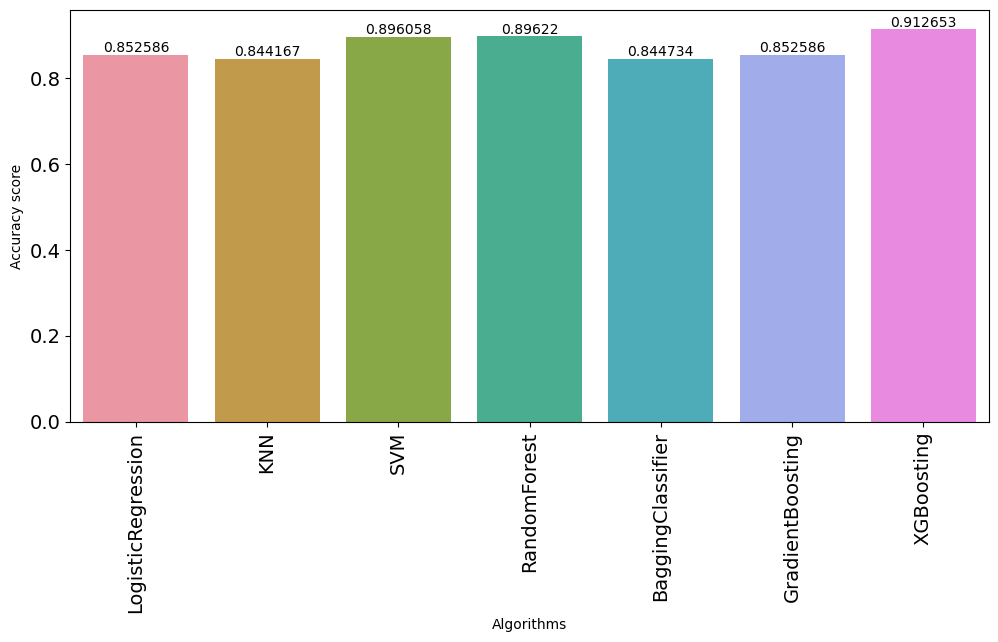

In [125]:
#Barplot
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Summary
* After experimenting with various models, the XGBoost model achieved an accuracy score of 91%, demonstrating 
  its superior performance in predicting customer behavior.
* This accomplishment establishes a solid foundation for accurate predictions."

# Task3:-Suggestions to the Bank market team to make customers buy the product.
  Based on the analysis of the dataset, here are some suggestions for the bank's marketing team to improve their 
  efforts in convincing customers to buy the product:

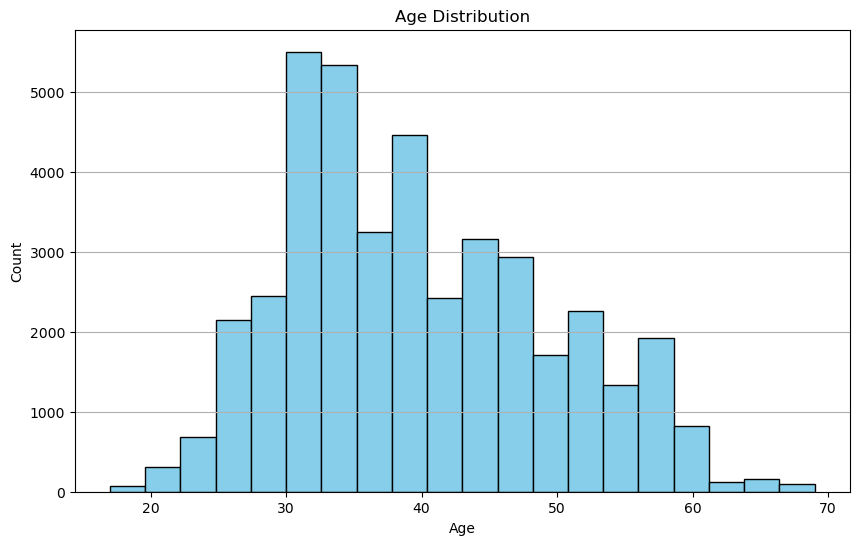

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'age' with the actual column name for age in your dataset

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Our Insights For Age Distribution:

* Examine the overall distribution of ages in the dataset. Are there certain age groups that are more prevalent?

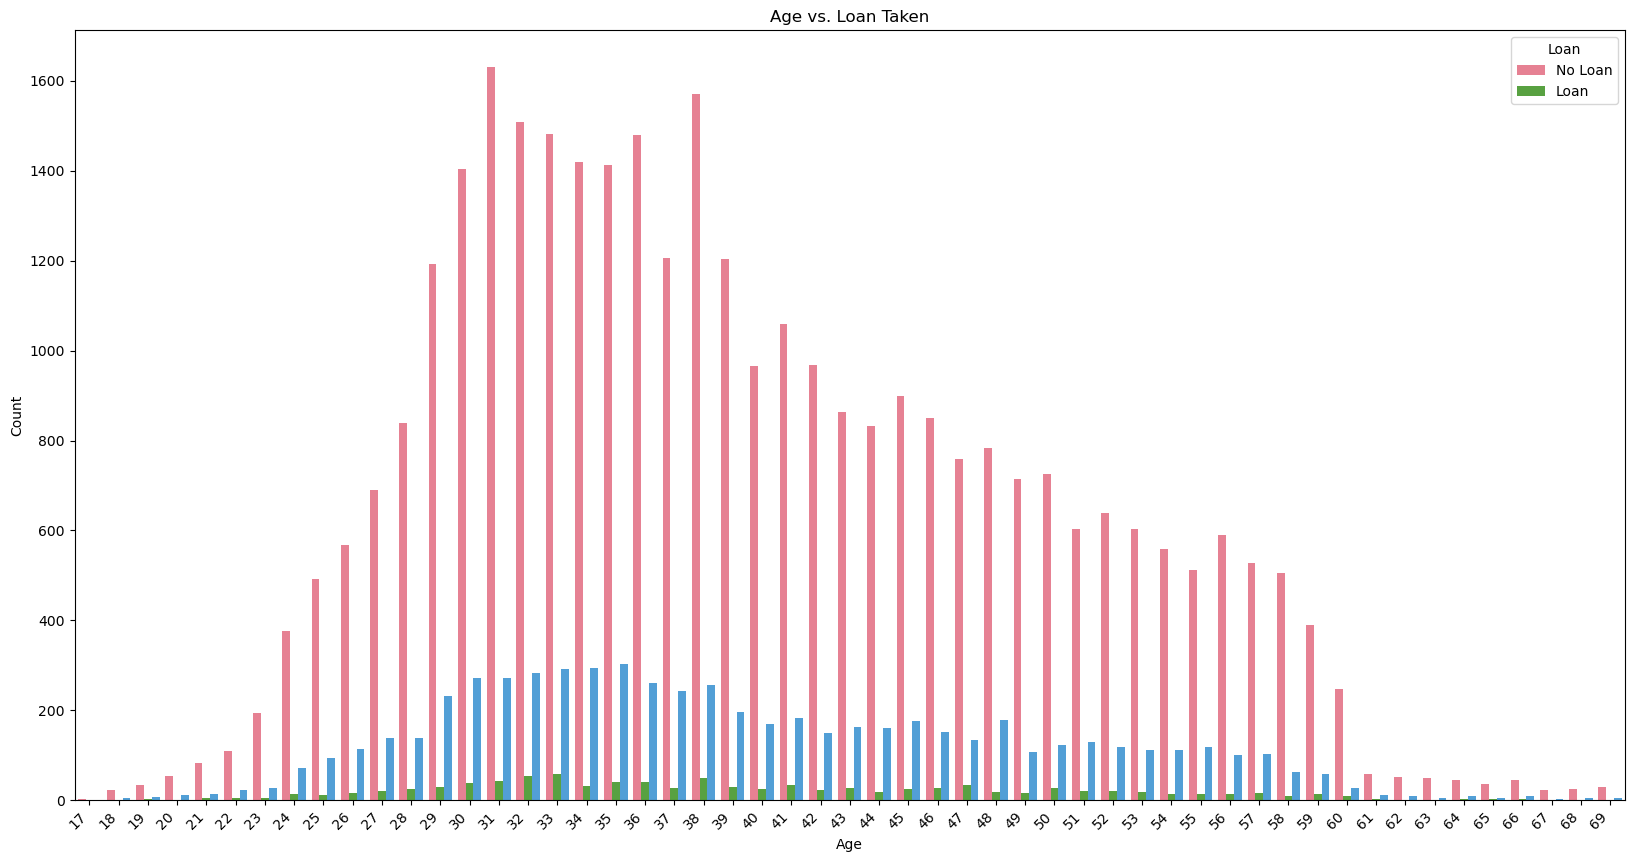

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'age' and 'loan' with the actual column names from your dataset

# Plotting with better control over the layout
plt.figure(figsize=(20, 10))
sns.countplot(x='age', hue='loan', data=data, palette='husl')
plt.title('Age vs. Loan Taken')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Loan', loc='upper right', labels=['No Loan', 'Loan'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

### Our Insighys For Loan Status Variation with Age:

* Observe how the points (representing individuals) are distributed across different ages concerning loan status. This can provide insights into whether certain age groups are more likely to take a loan.
* Assess the risk associated with different age groups. For instance, if there's a concentration of loans in a particular age range, it might indicate a specific risk profile.

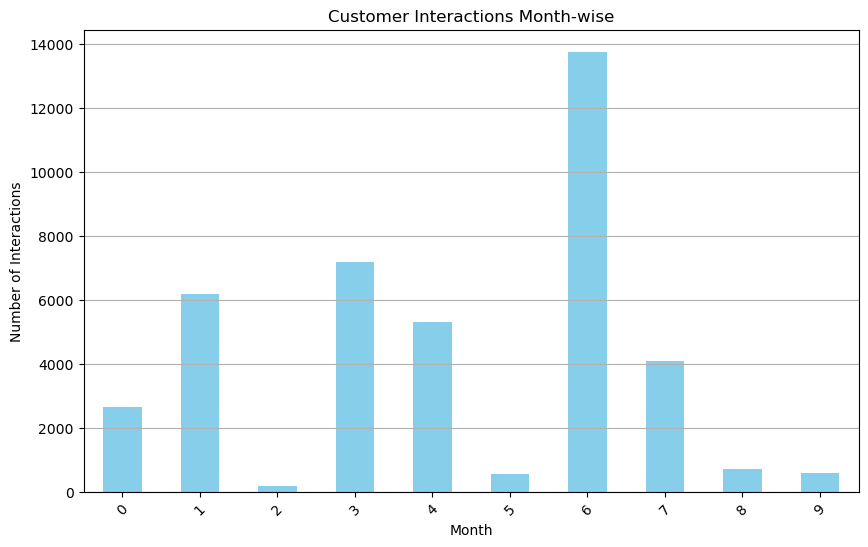

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'month' with the actual column name representing months in your dataset
# Assuming 'month' is a categorical variable, if it's not, you might need to convert it to one.

# Count the occurrences of each month
monthly_counts = data['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Interactions Month-wise')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

### Our Insights For Customer Interaction Month wise
* We Can See That In Month Of May The Interaction Of Customer Is More
* In Other Hand We Can See The Customer Interaction Is Very Low In December Month

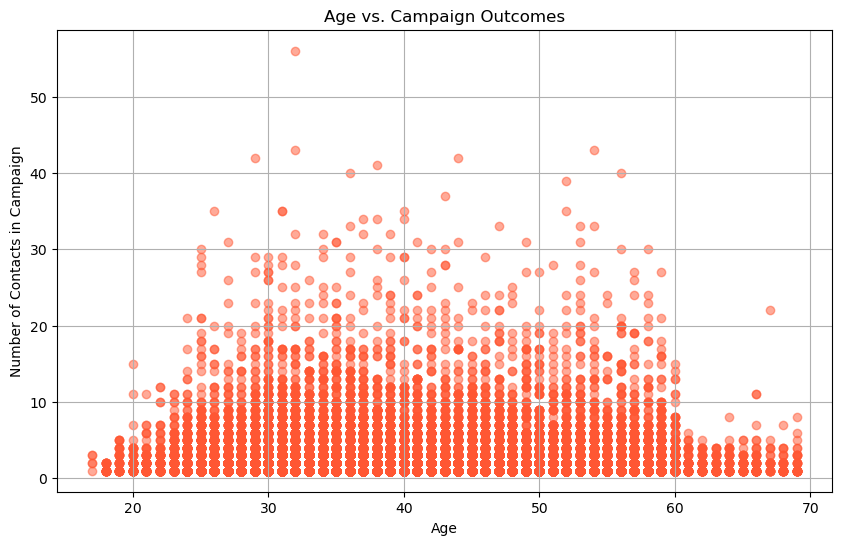

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'age' and 'campaign' with the actual column names from your dataset
age = data['age']
campaign = data['campaign']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(age, campaign, alpha=0.5)
plt.title('Age vs. Campaign Outcomes')
plt.xlabel('Age')
plt.ylabel('Number of Contacts in Campaign')
plt.grid(True)
plt.show()

### Our Insights For Age vs Compaign:
* We Can See While Doing Compaign The More Visiters Age Is Between 30 to 40

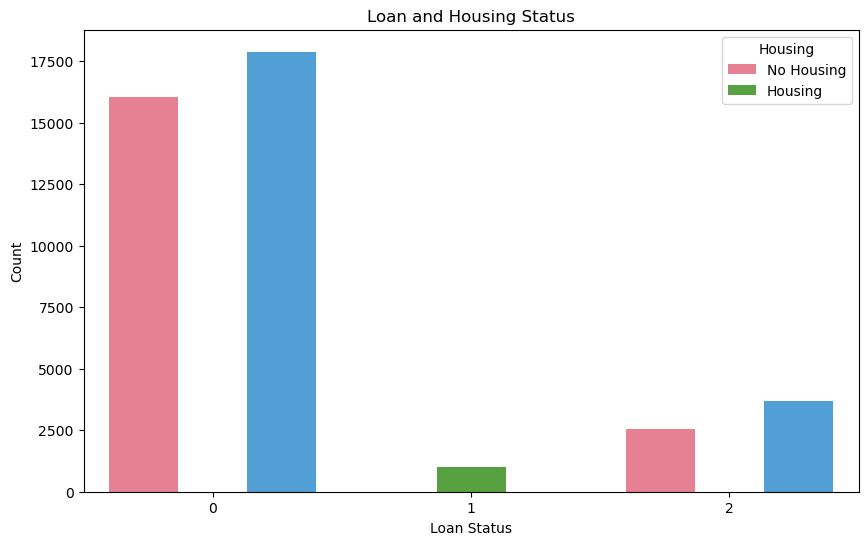

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'loan' and 'housing' with the actual column names from your dataset

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='housing', data=data, palette='husl')
plt.title('Loan and Housing Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Housing', loc='upper right', labels=['No Housing', 'Housing'])
plt.show()

### Our Insights For Loan vs housing

* Observe the overall distribution of loans ('No Loan' and 'Loan'). Determine the prevalence of loans in the dataset.
#### Loan Status by Housing:

* Compare the distribution of loans based on housing status. This can provide insights into whether housing status correlates with the likelihood of having a loan.
#### Identifying Patterns:

#### Look for patterns such as:
* Are there more loans among individuals with housing?
* Is there a difference in loan status between those with and without housing?
#### Risk Assessment:

* Assess the risk associated with loan and housing status combinations. For example, if individuals with both housing and loans represent a significant portion, it might indicate a particular risk profile.
#### Targeted Marketing Strategies:

* Consider how the combination of loan and housing status can inform targeted marketing strategies. For instance, if there's a clear pattern, you might tailor marketing campaigns to specific groups.

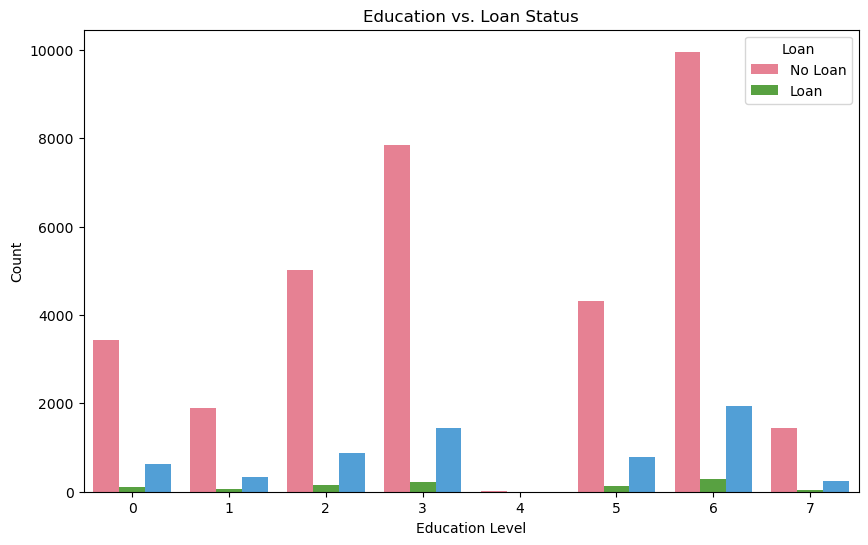

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'education' and 'loan' with the actual column names from your dataset

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='loan', data=data, palette='husl')
plt.title('Education vs. Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan', loc='upper right', labels=['No Loan', 'Loan'])
plt.show()

### Our Insights For Loan Distribution Across Education Levels:

* By looking at the count of 'No Loan' and 'Loan' for each education level, you can observe how the distribution of loans varies. This could give you an understanding of the overall prevalence of loans in different education groups.
#### Comparison of Loan Status:

* Compare the height of the bars for 'No Loan' and 'Loan' within each education level. If the 'Loan' bar is significantly higher in certain education levels, it suggests that individuals with those education levels are more likely to have a loan.
#### Loan Patterns Across Education Levels:

* Look for trends or patterns in the data. For example, do individuals with higher education levels tend to have fewer loans? Or is there no clear relationship?
#### Identification of High-Risk or Low-Risk Groups:

* Identify education levels where the proportion of individuals with loans is notably high or low. This insight can be valuable for risk assessment or targeting specific customer segments for financial products.

# Targeting :

  Focus marketing efforts on customers who are more likely to subscribe to the product. Analyze the characteristics 
  of customers who have already subscribed, especially those with 'yes' in the 'loan' and 'housing' categories. 
  These may be more inclined to purchase additional products.

# Contact Strategy:

  Analyze the 'campaign' variable to determine the optimal number of contacts. It appears that, on average, customers 
  were contacted about 2.57 times during the campaign. However, consider segmenting the audience and tailoring the 
  contact strategy based on factors like age, marital status, and previous contact history.

# Previous Contacts:

  Address the class imbalance issue in the 'previous' variable. Since most values are 0, consider oversampling 
  or undersampling techniques to balance the dataset. This can help improve the model's predictive accuracy when 
  targeting customers who have been contacted before.

# Economic Indicators:

  Leverage economic indicators such as 'emp.var.rate,' 'cons.price.idx,' and 'cons.conf.idx' to create marketing 
  campaigns that align with economic conditions. For example, when the employment variation rate is favorable, 
  emphasize the product's benefits in such scenarios.

# Duration of Calls:

  Analyze the impact of call duration ('duration') on subscription rates. Longer conversations may indicate higher 
  interest. Develop strategies for extending conversations with potential customers to convey the value 
  proposition effectively.


# Month and Day of Week:

  Explore seasonality effects by analyzing the 'month' and 'day_of_week' variables. Adjust marketing strategies to 
  account for potential seasonality trends that may influence customer behavior.

# Data Privacy and Compliance:

 Ensure that all marketing efforts comply with data privacy regulations such as GDPR to build trust with customers.

# Continuous Monitoring:

 Continuously monitor the results of marketing campaigns and adjust strategies accordingly. Data-driven decision-making
 is essential for improving campaign effectiveness over time.

# Challenges Faced in Data and Techniques used in Protugese Bank Sales Prediction

# Data Quality

 Challenge: The dataset contained missing values, outliers, and inconsistencies.

 Solution: We addressed data quality issues by performing data cleaning, imputation of duplicate values, 
 and outlier detection and treatment. This ensured that our analysis was based on reliable data.

# Data Imbalance

Challenge: The 'y' variable exhibited class imbalance, with one class dominating the other.

Solution: To address class imbalance, we employed the Synthetic Minority Over-sampling Technique (SMOTE). 
SMOTE is a powerful method for generating synthetic samples of the minority class, effectively increasing its
representation in the dataset. This approach balanced the distribution of the target variable and significantly 
improved the model's performance.

# Model Selection

Challenge: Choosing the right predictive model was essential for accurate predictions.

Solution: We explored various machine learning algorithms, including logistic regression, decision trees, 
random forests, and XGBoost. After thorough evaluation, the XGBoost model demonstrated superior performance.

# Hyperparameter Tuning

Challenge: Optimizing model hyperparameters was necessary to achieve the best results.

Solution: We performed hyperparameter tuning using grid search, finding the optimal set of hyperparameters 
that improved the model's predictive accuracy.
# Conclusion
Building a predictive model to assist the bank marketing team in identifying customers who are likely to buy
a product is a valuable initiative. With an XGBoost model achieving an accuracy score of 91%, you have a strong
foundation for predicting customer behavior.